# Problem statement

## Context 
Banks offer credits, which can be considered as short- and long-term investments with their own risks. Sometimes client can delay payments or even stop paying at all. Latter situation is called 'default' can result in monetary losses for the bank. To avoid clients that might default banks hire credit officers that evaluate each client, based on the available data. Some banks prefer using credit scorecards, which contain simple classification of the clients to predict the probability of default. However, such scorecards are usually developed utilizing inferior methods. In this porject I try to develop credit scorecard and model that can automatically evaluate each client faster than any credit officer.

## Goals
* Build model with acceptable precision and recall.
* Find best predictor factors of the default.
* Make a credit scorecard and prepare it for implementation.


# Data exploration

## Data source
Original dataset, in the form provided by Prof. Hofmann, was downloaded from [UCI Irvine Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data))

## Data description
Number of Instances:  1000

Attribute 1:  (qualitative)
	      * Status of existing checking account
          * A11 :      ... <    0 DM
	      * A12 : 0 <= ... <  200 DM
	      * A13 :      ... >= 200 DM / salary assignments for at least 1 year
          * A14 : no checking account

Attribute 2:  (numerical)
          * Duration in month

Attribute 3:  (qualitative)
	      * Credit history
	      * A30 : no credits taken/all credits paid back duly
          * A31 : all credits at this bank paid back duly
	      * A32 : existing credits paid back duly till now
          * A33 : delay in paying off in the past
	      * A34 : critical account/other credits existing (not at this bank)

Attribute 4:  (qualitative)
	      * Purpose
	      * A40 : car (new)
	      * A41 : car (used)
	      * A42 : furniture/equipment
	      * A43 : radio/television
	      * A44 : domestic appliances
	      * A45 : repairs
	      * A46 : education
	      * A47 : (vacation - does not exist?)
	      * A48 : retraining
	      * A49 : business
	      * A410 : others

Attribute 5:  (numerical)
	      * Credit amount

Attibute 6:  (qualitative)
	      * Savings account/bonds
	      * A61 :          ... <  100 DM
	      * A62 :   100 <= ... <  500 DM
	      * A63 :   500 <= ... < 1000 DM
	      * A64 :          .. >= 1000 DM
          * A65 :   unknown/ no savings account

Attribute 7:  (qualitative)
	      * Present employment since
	      * A71 : unemployed
	      * A72 :       ... < 1 year
	      * A73 : 1  <= ... < 4 years  
	      * A74 : 4  <= ... < 7 years
	      * A75 :       .. >= 7 years

Attribute 8:  (numerical)
	      * Installment rate in percentage of disposable income

Attribute 9:  (qualitative)
	      * Personal status and sex
	      * A91 : male   : divorced/separated
	      * A92 : female : divorced/separated/married
          * A93 : male   : single
	      * A94 : male   : married/widowed
	      * A95 : female : single

Attribute 10: (qualitative)
	      * Other debtors / guarantors
	      * A101 : none
	      * A102 : co-applicant
	      * A103 : guarantor

Attribute 11: (numerical)
	      * Present residence since

Attribute 12: (qualitative)
	      * Property
	      * A121 : real estate
	      * A122 : if not A121 : building society savings agreement/life insurance
          * A123 : if not A121/A122 : car or other, not in attribute 6
	      * A124 : unknown / no property

Attribute 13: (numerical)
	      * Age in years

Attribute 14: (qualitative)
	      * Other installment plans 
	      * A141 : bank
	      * A142 : stores
	      * A143 : none

Attribute 15: (qualitative)
	      * Housing
	      * A151 : rent
	      * A152 : own
	      * A153 : for free

Attribute 16: (numerical)
          * Number of existing credits at this bank

Attribute 17: (qualitative)
	      * Job
	      * A171 : unemployed/ unskilled  - non-resident
	      * A172 : unskilled - resident
	      * A173 : skilled employee / official
	      * A174 : management/ self-employed/highly qualified employee/ officer

Attribute 18: (numerical)
	      * Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
	      * Telephone
	      * A191 : none
	      * A192 : yes, registered under the customers name

Attribute 20: (qualitative)
	      * Foreign worker
	      * A201 : yes
	      * A202 : no
          
Attribute 21: (qualitative)
          * Evaluation of the customer
          * (1 = Good,  2 = Bad)


In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics as metrics

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
/*Disabling autoscrolling for long graphs*/

<IPython.core.display.Javascript object>

In [3]:
# Dataset didn't contain column names, so I named them myself.
data = pd.read_table("german.data", sep=" ", names = ['check_acc','duration','history','purpose', 'amount', 'savings', 'employment', 'installment_rate', 'marital_sex', 'other_debtors', 'residence_since', 'property', 'age', 'other_installment_plan', 'housing', 'n_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'good_bad'])

In [4]:
data.head()

,check_acc,duration,history,purpose,amount,savings,employment,installment_rate,marital_sex,other_debtors,...,property,age,other_installment_plan,housing,n_credits,job,people_liable,telephone,foreign_worker,good_bad
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


# Exploratory Data Analysis

## Univariate analysis

In [5]:
data.nunique()

check_acc                   4
duration                   33
history                     5
purpose                    10
amount                    921
savings                     5
employment                  5
installment_rate            4
marital_sex                 4
other_debtors               3
residence_since             4
property                    4
age                        53
other_installment_plan      3
housing                     3
n_credits                   4
job                         4
people_liable               2
telephone                   2
foreign_worker              2
good_bad                    2
dtype: int64

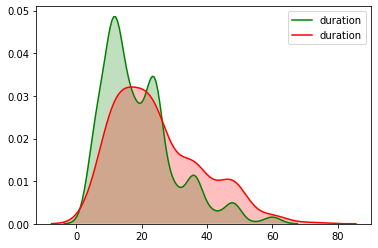

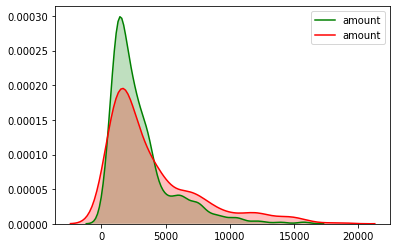

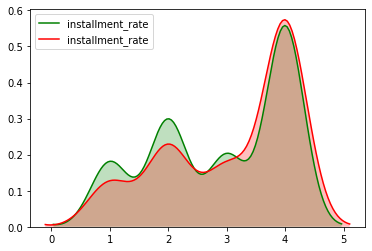

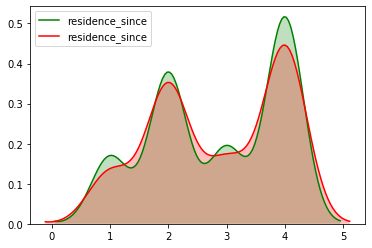

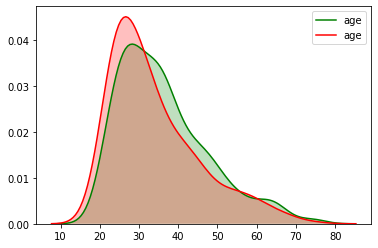

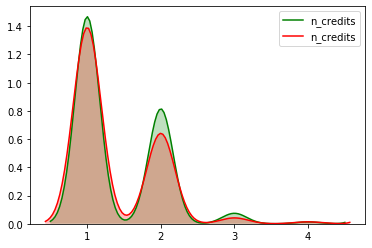

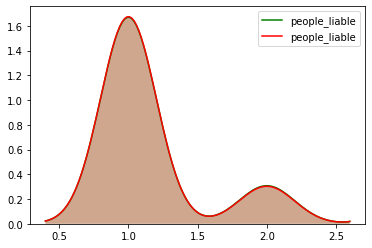

In [6]:
for col in [cname for cname in data.columns[:-1] if data[cname].dtype in ['int64', 'float64']][:-1]:
    good = sns.kdeplot(data.loc[(data.good_bad == 1)][col], shade=True, color="g")
    bad = sns.kdeplot(data.loc[(data.good_bad == 2)][col], shade=True, color="r")
    
    # Show plot
    plt.show()
    
#separately show 'people_liable' column because auto-calculated bandwith is 0 
good = sns.kdeplot(data.loc[(data.good_bad == 1)].people_liable, shade=True, color="g", bw = 0.2)
bad = sns.kdeplot(data.loc[(data.good_bad == 2)].people_liable, shade=True, color="r", bw = 0.2)

# Show plot
plt.show()

We can observe quite obvious results:
* The shorter credit duration, the better.
* The smaller credit amount, the better.
* The smaller installment rate, the better.
* Duration of ownership of current residence didn't show any correlations.
* The older bank client, the better (visible advantage appears after 30 years). 
* Customers with 2 credits in that bank tend to be better (presumably 1 is not enough to ensure loaylty, and 3 might be too much to handle).
* Number of people being liable to provide maintenance for doesn't affect the result value.

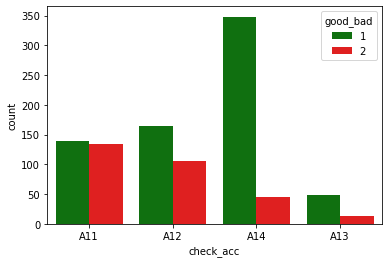

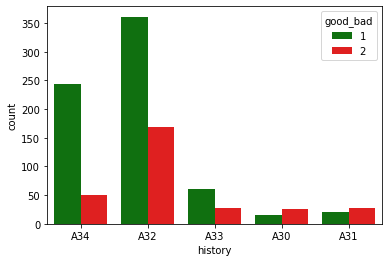

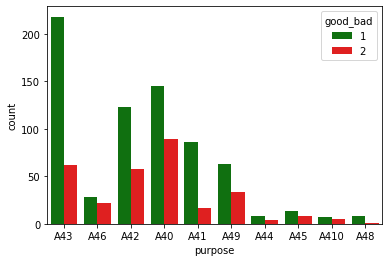

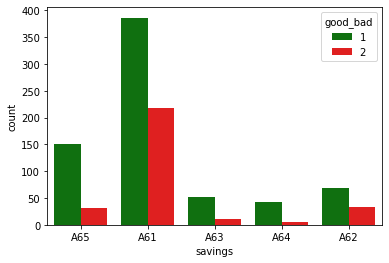

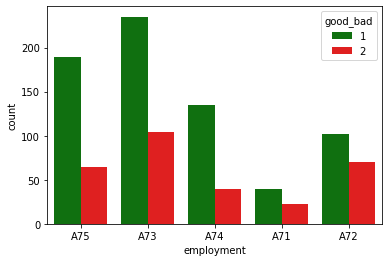

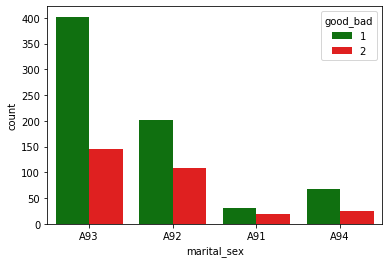

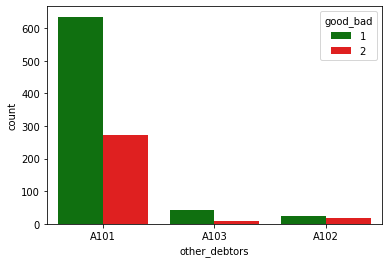

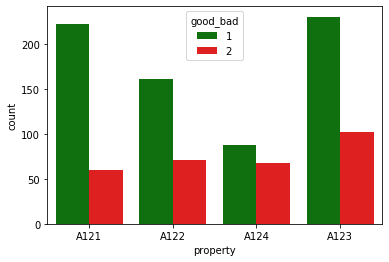

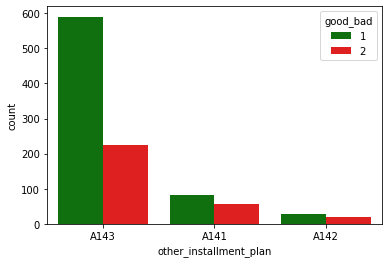

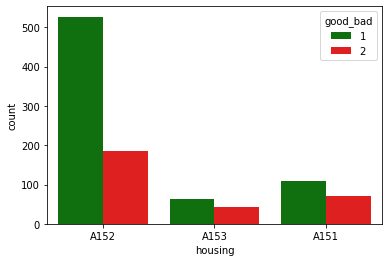

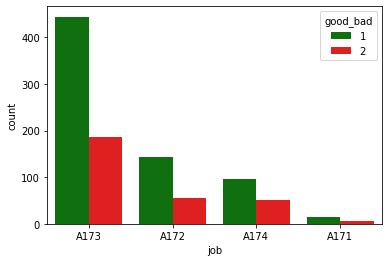

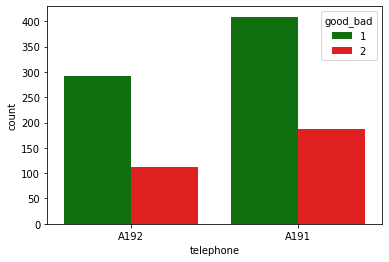

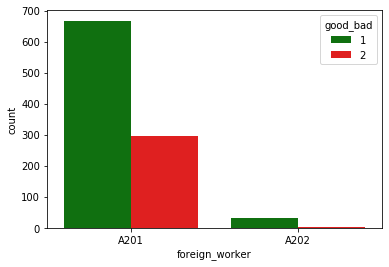

In [7]:
for col in [cname for cname in data.columns[:-1] if data[cname].dtype == 'object']:
    sns.countplot(x=col, hue="good_bad", data=data, palette=['g', 'r'])
    
    # Show plot
    plt.show()

Some of the conclusions derived from the plots don't make sense, so further analysis is needed.
* The more checking account has money on it or there is no checking account, the better.
* For some reason there is bigger percentage of bad credits of those who paid them duly (needs further exploration).
* Purpose shouldn't be considered too seriously alone, because it presumably has correlation with amount (needs further exploration).
* The more savings account has money on it or there is no savings account, the better.
* The more stable client's employment, the better.
* Marital_sex has very confusing group separation, so no definite result can be derived.
* If there is a guarantor, credit is likely to be good. If there is a co-applicant, there is higher chance of credit being bad (maybe client feels less responsible and asks more money from co-applicant, which might refuse to borrow it).
* The more expensive property client has, the better.
* Owning a house, is better than renting it, which is better than having it for free.
* Job skill doesn't affect the result value.
* Telephone doesn't affect the result value.
* If client is a foreign worker, the chances of credit being bad are higher.

## Further exploration of categorical values
I make pairplots of certain categorical variables that didn't show any corelation in univariate analysis.

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


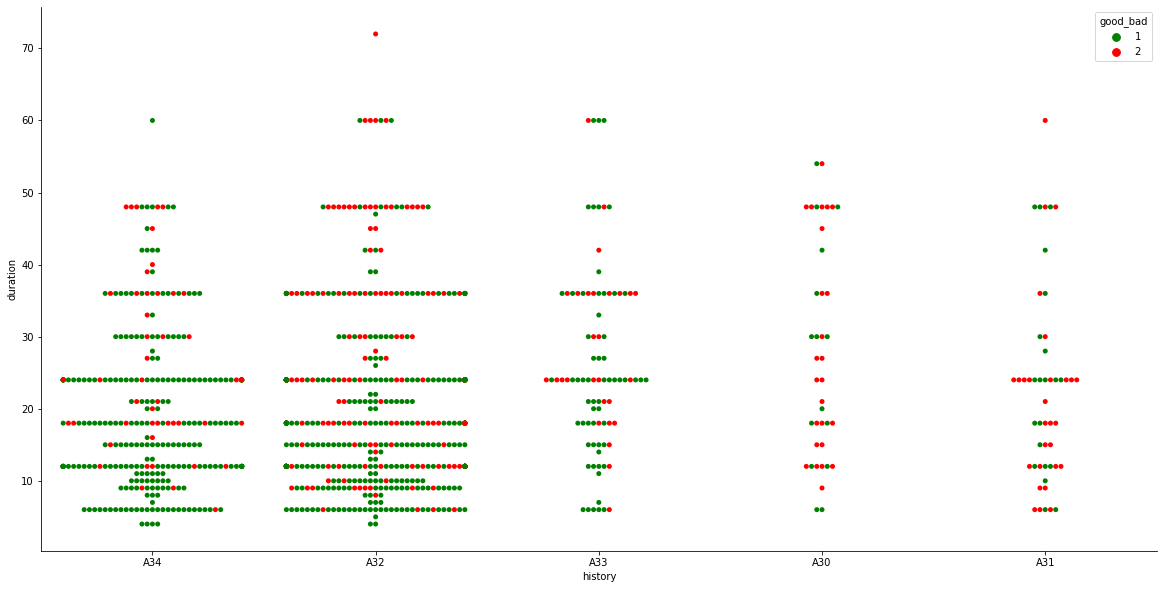

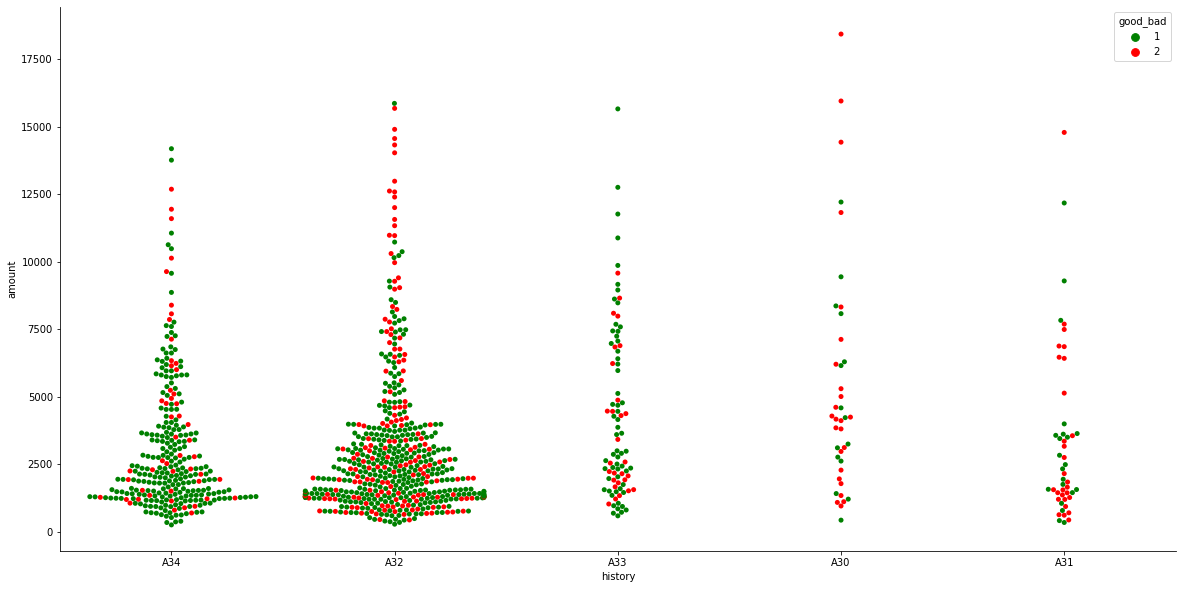

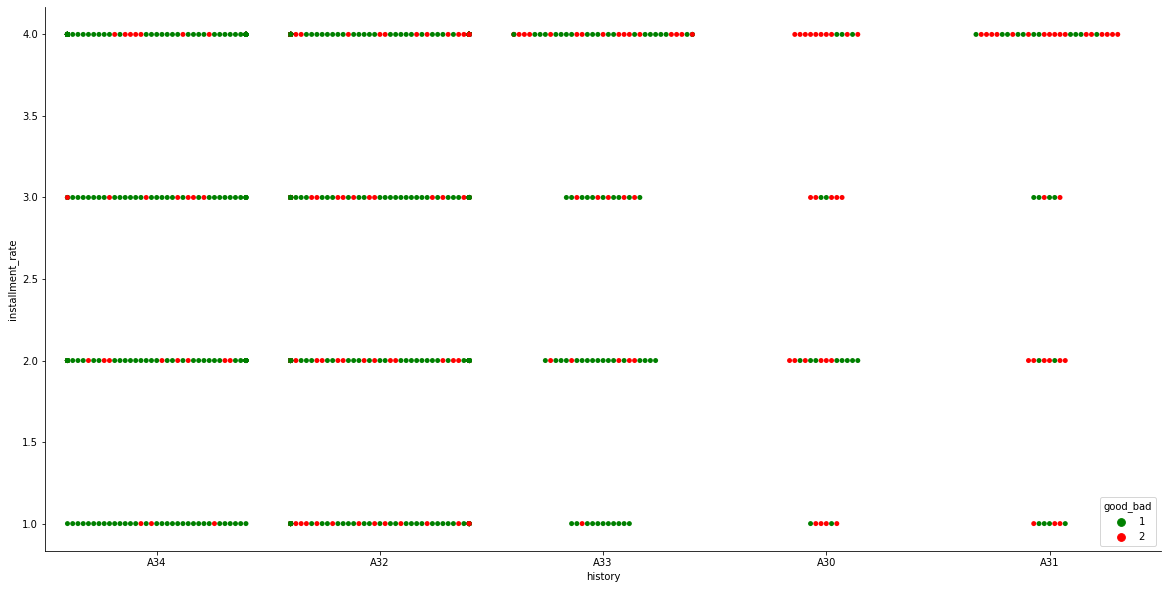

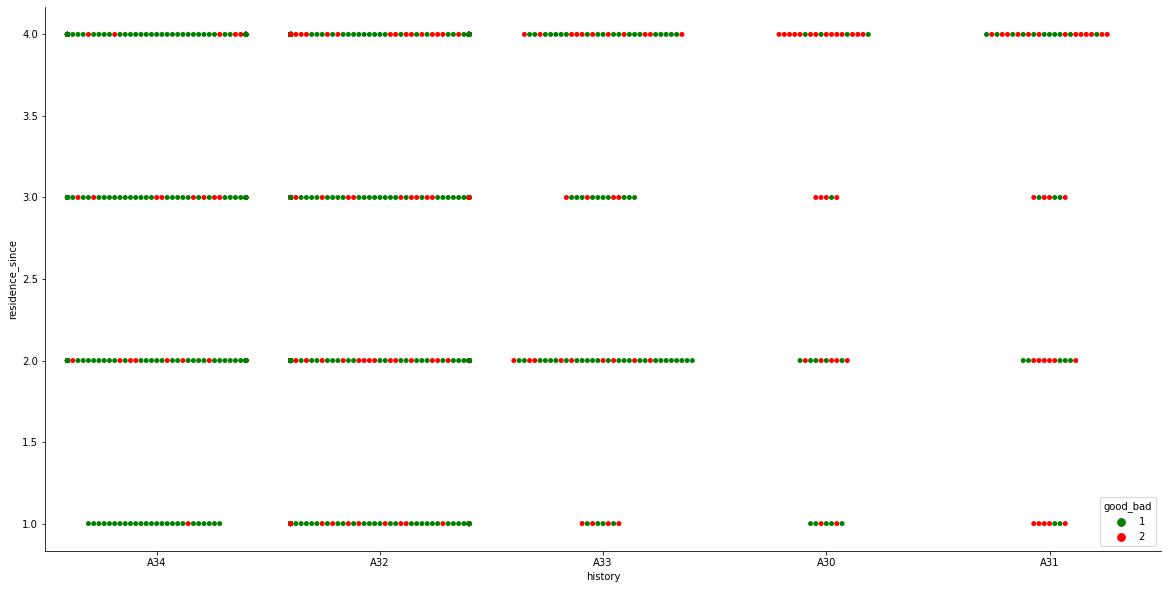

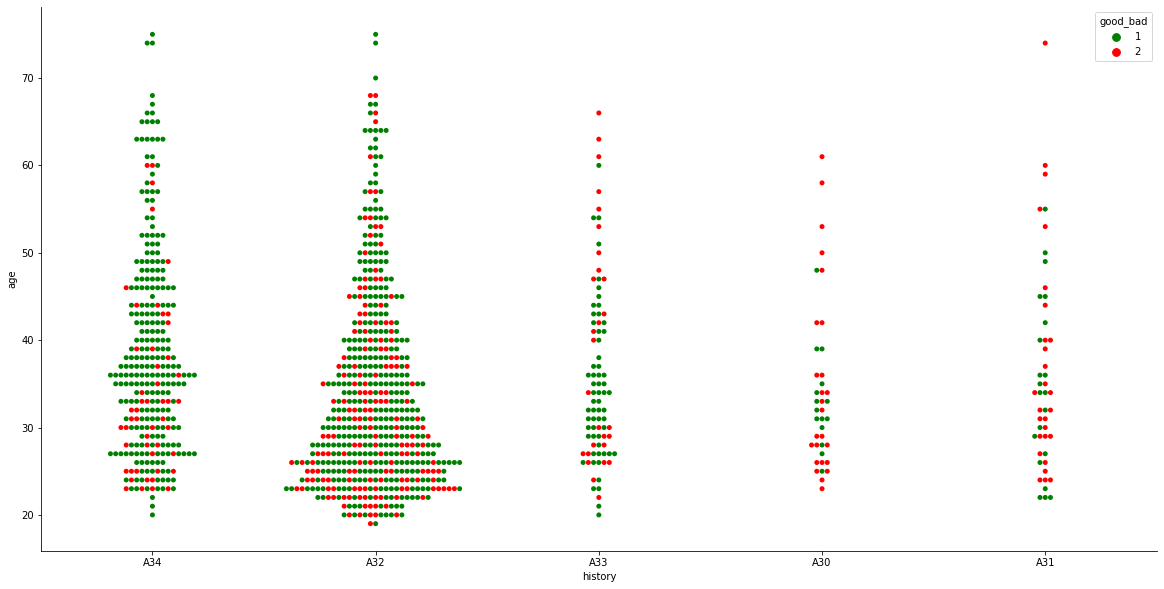

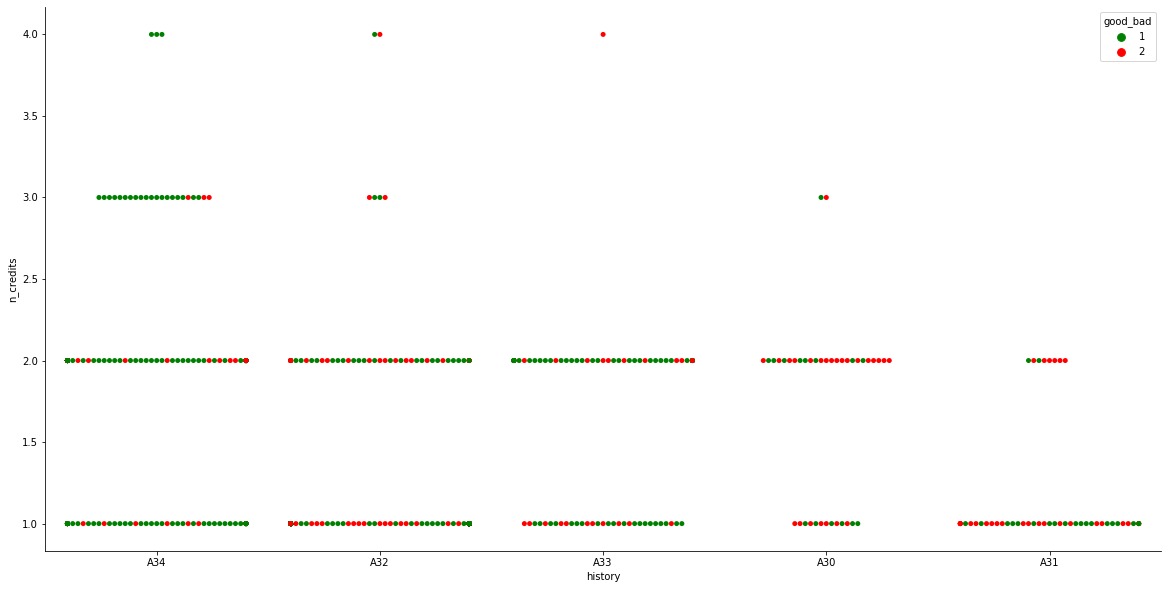

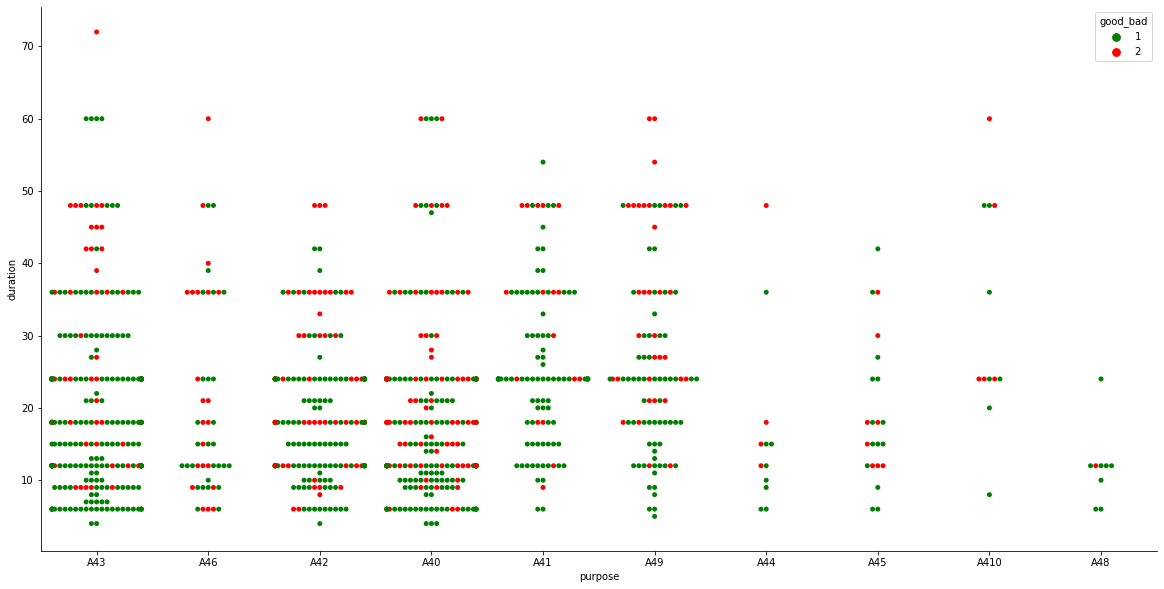

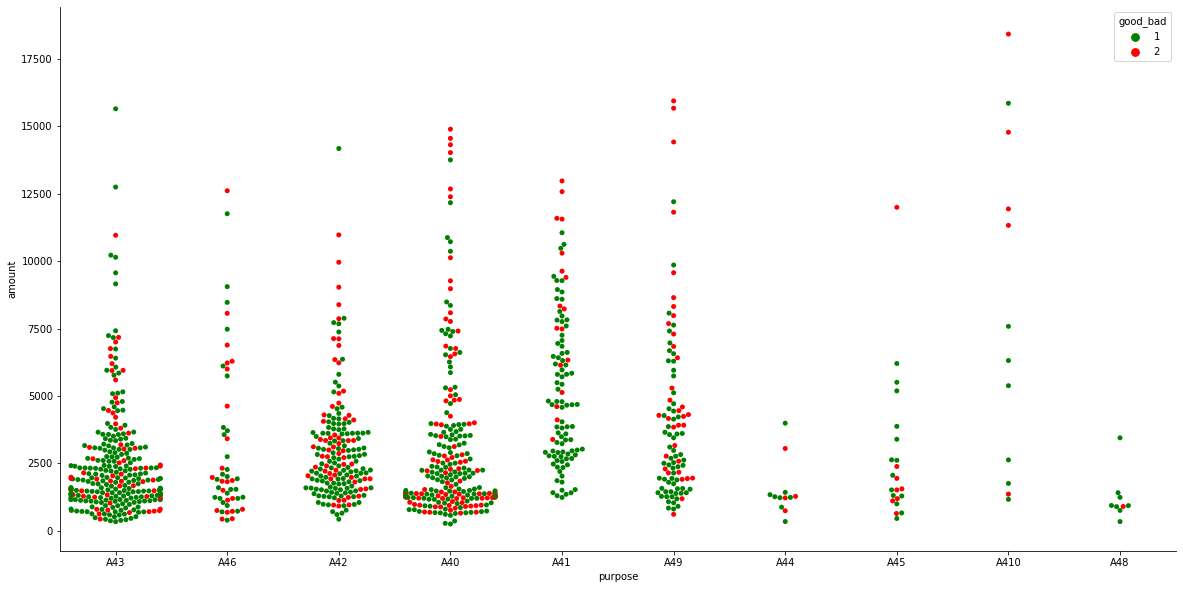

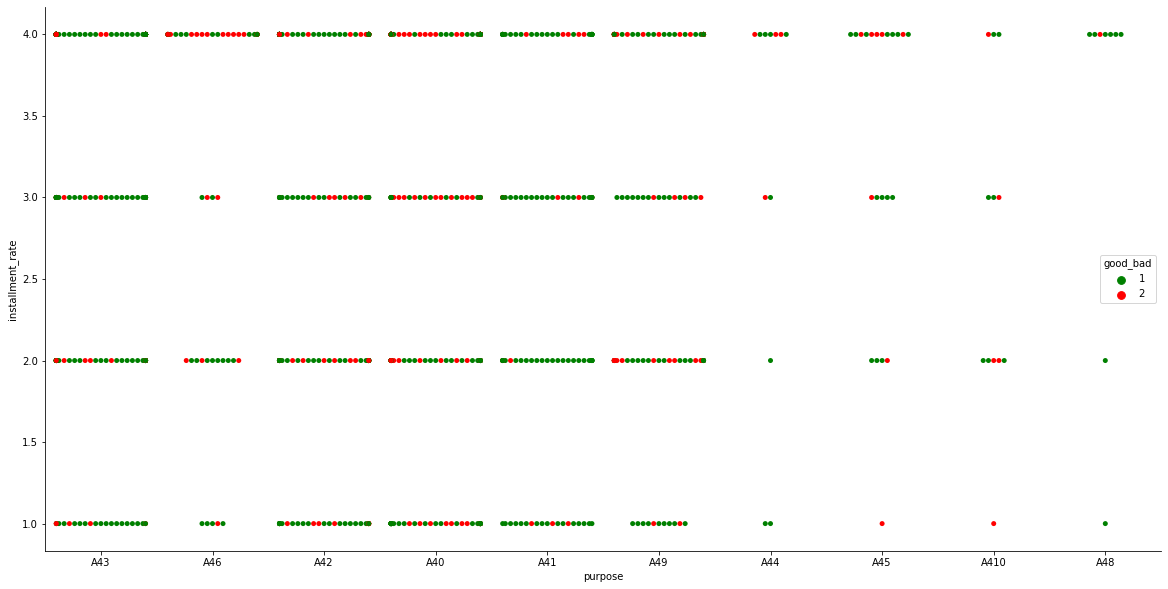

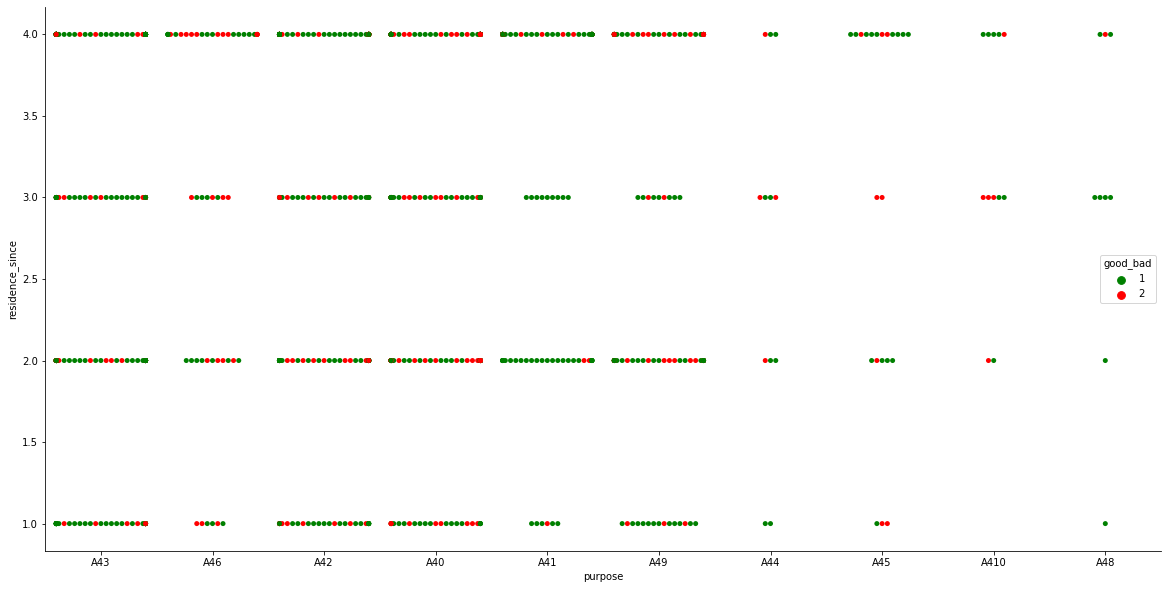

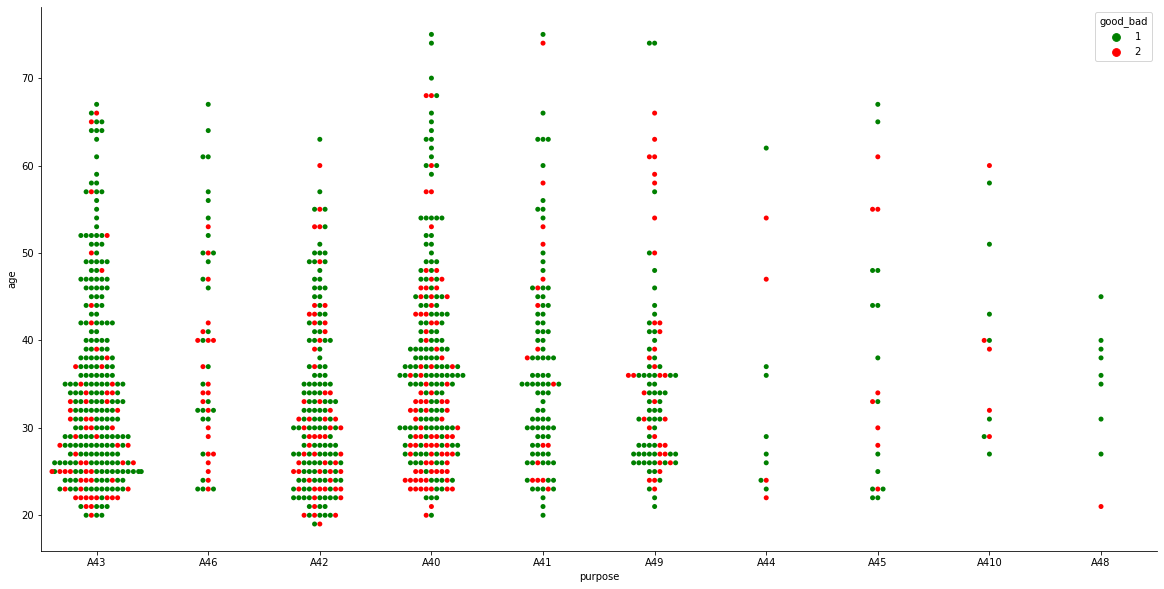

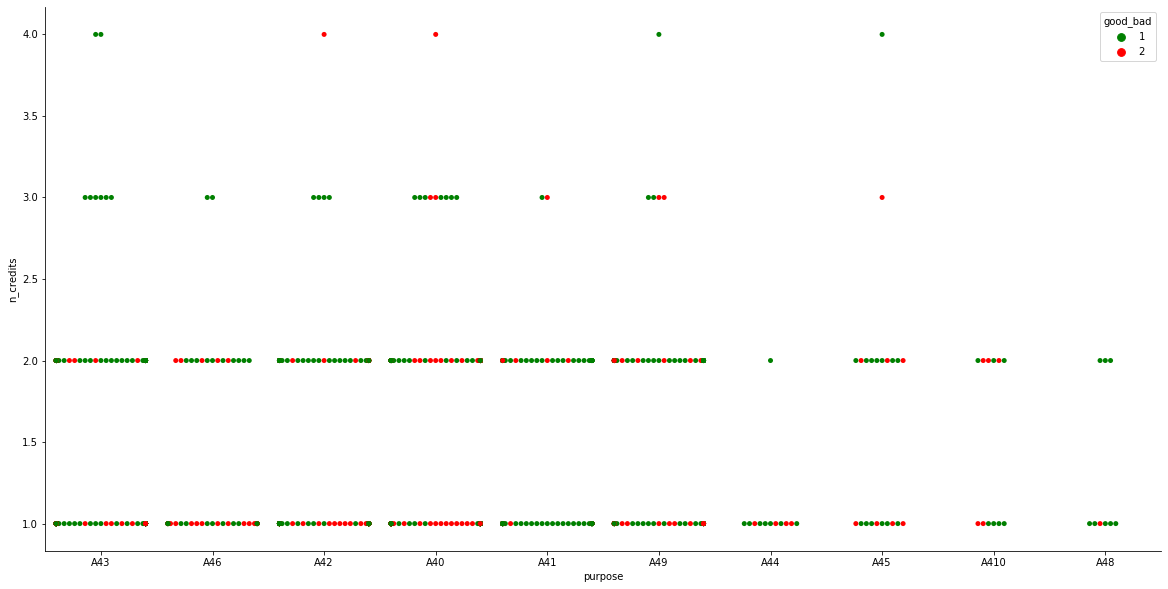

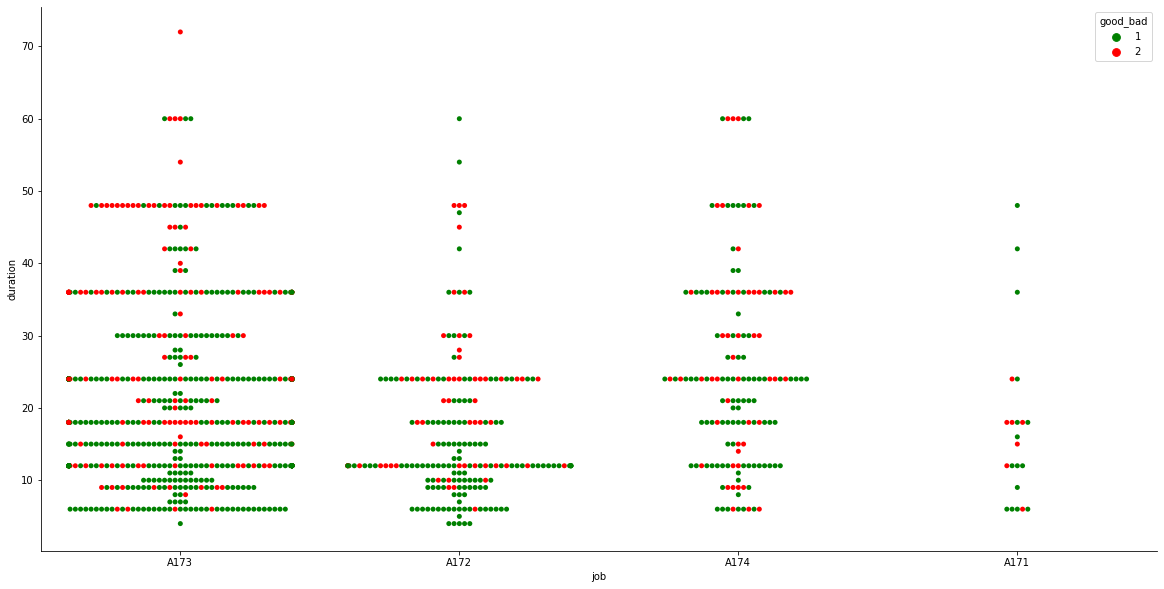

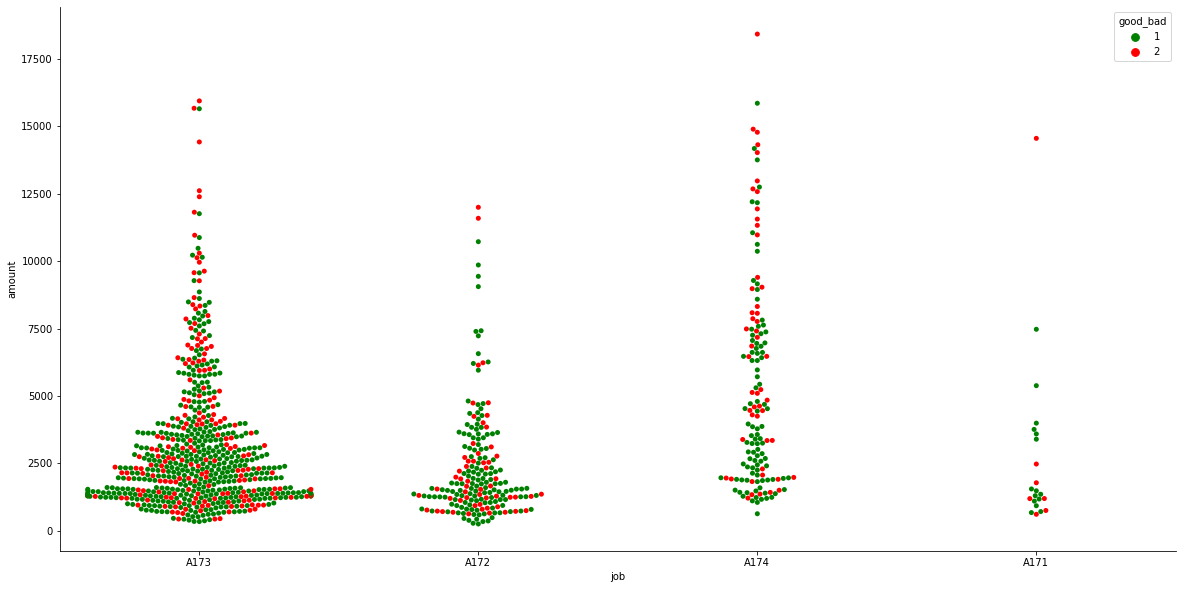

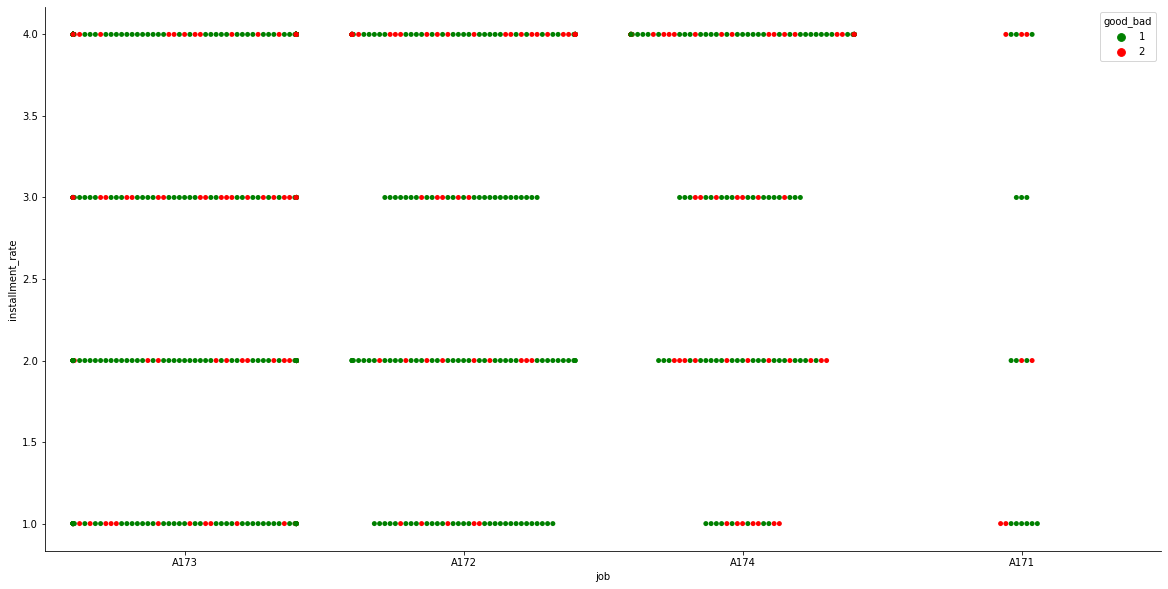

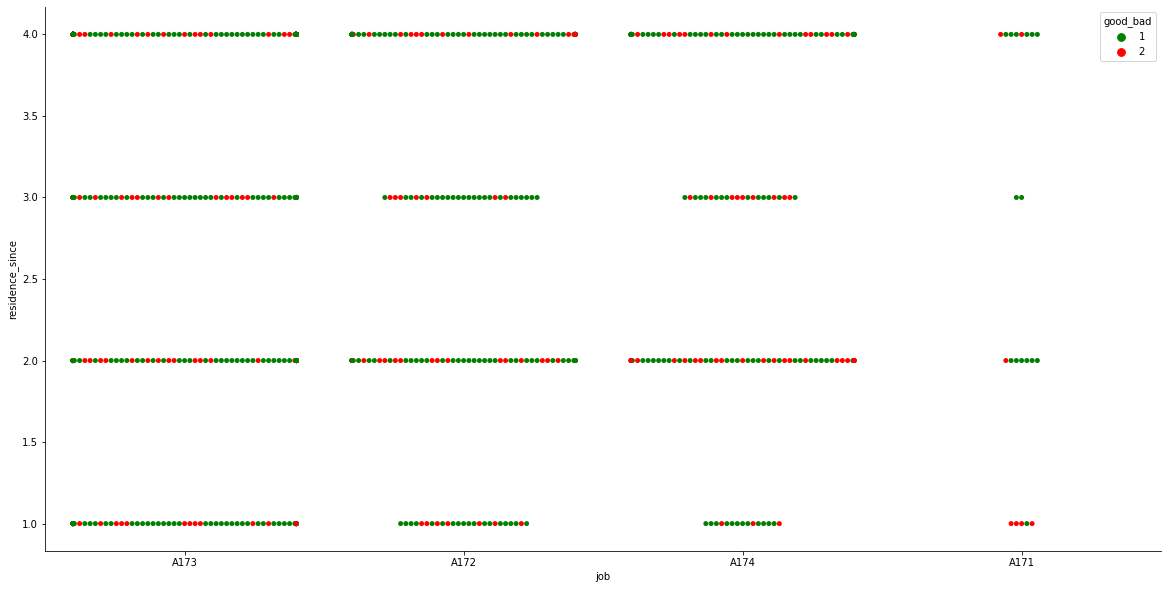

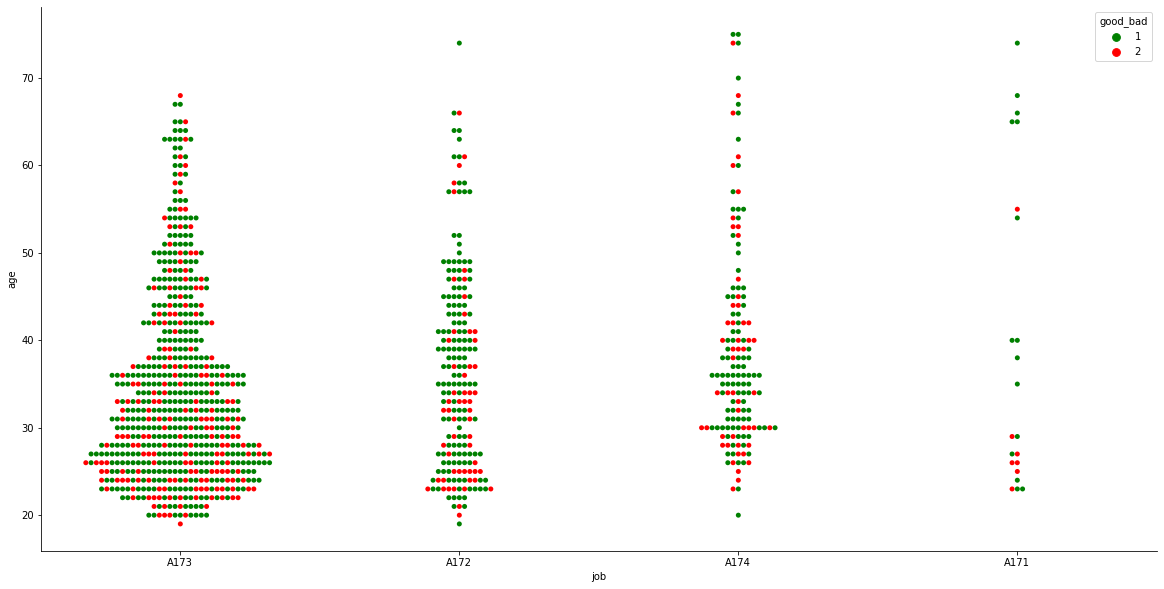

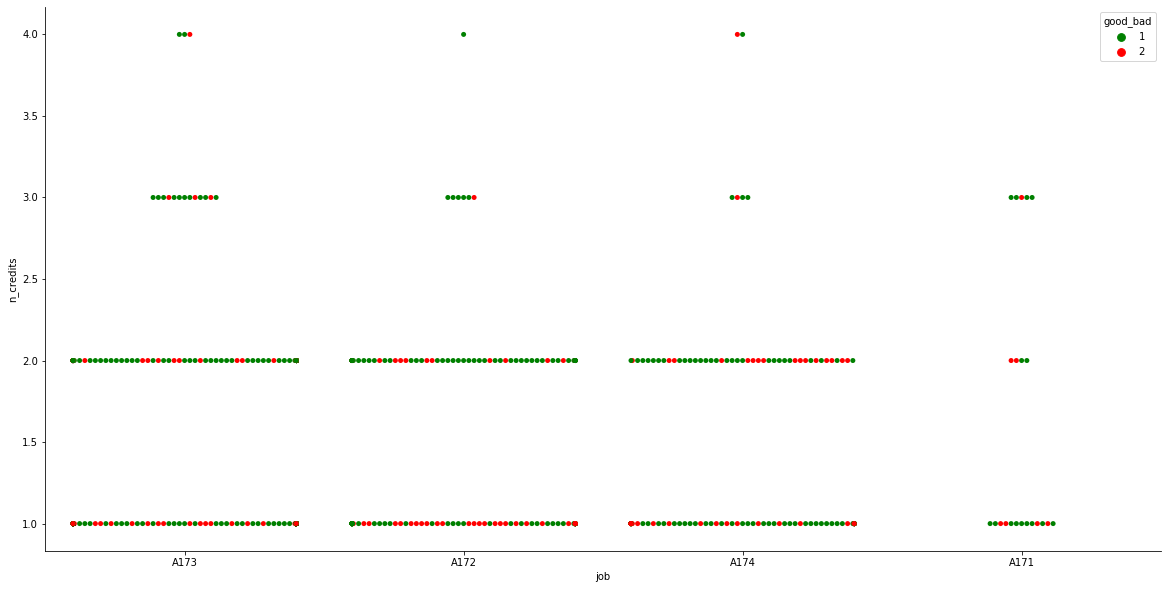

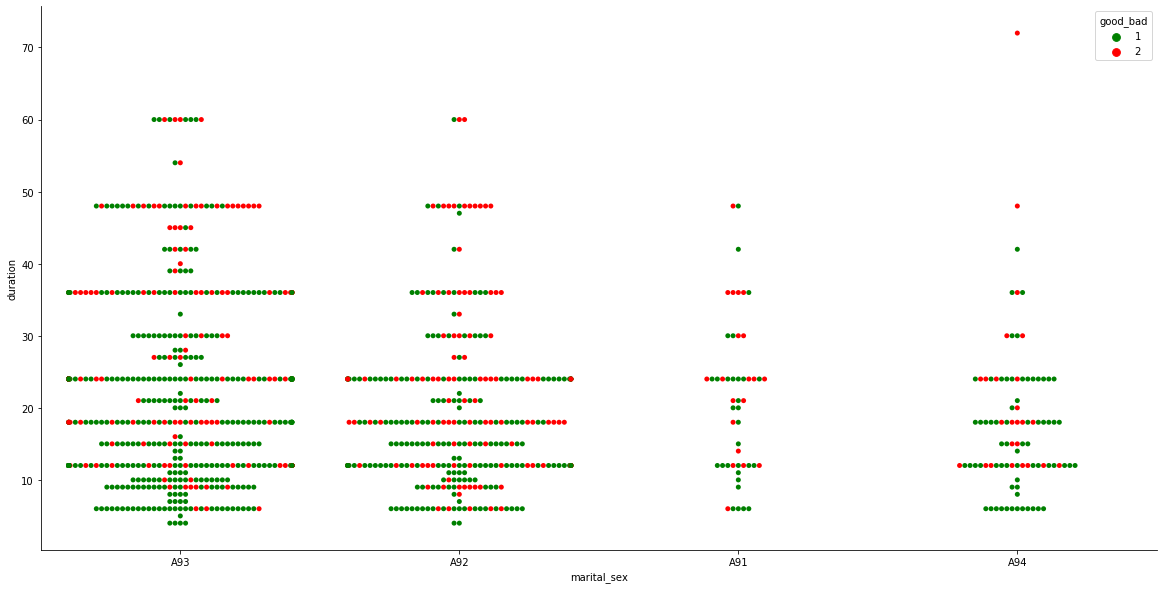

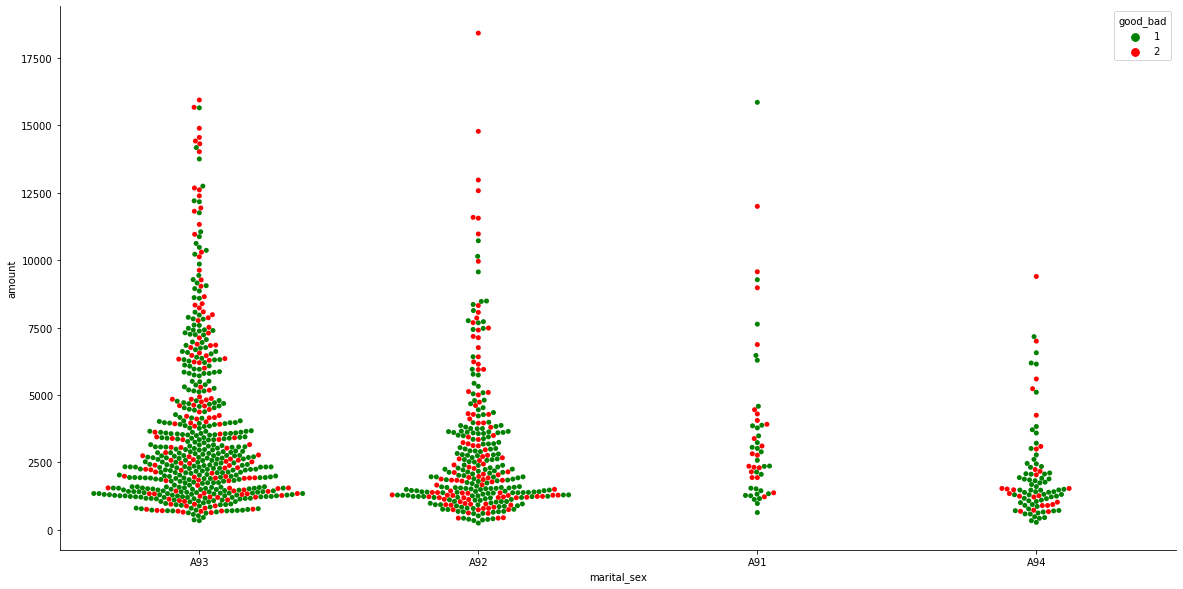

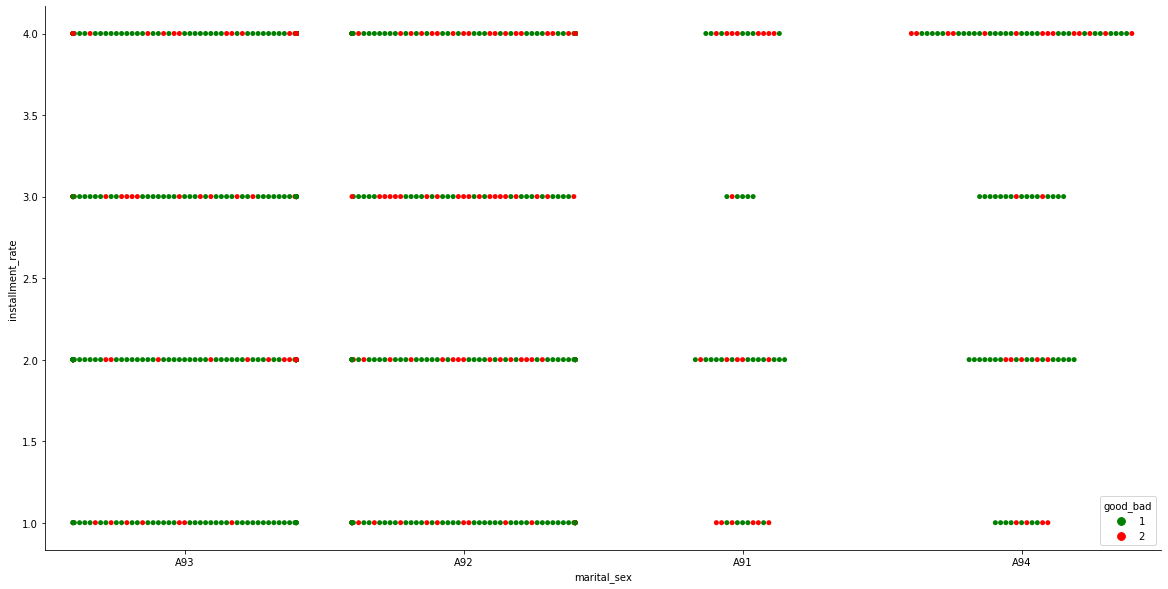

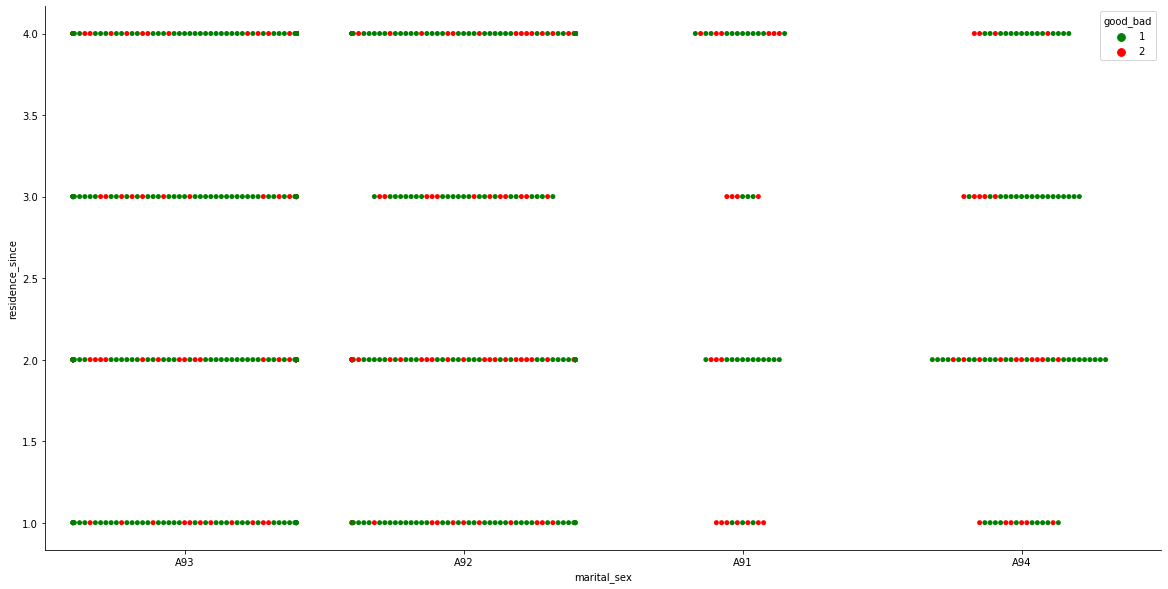

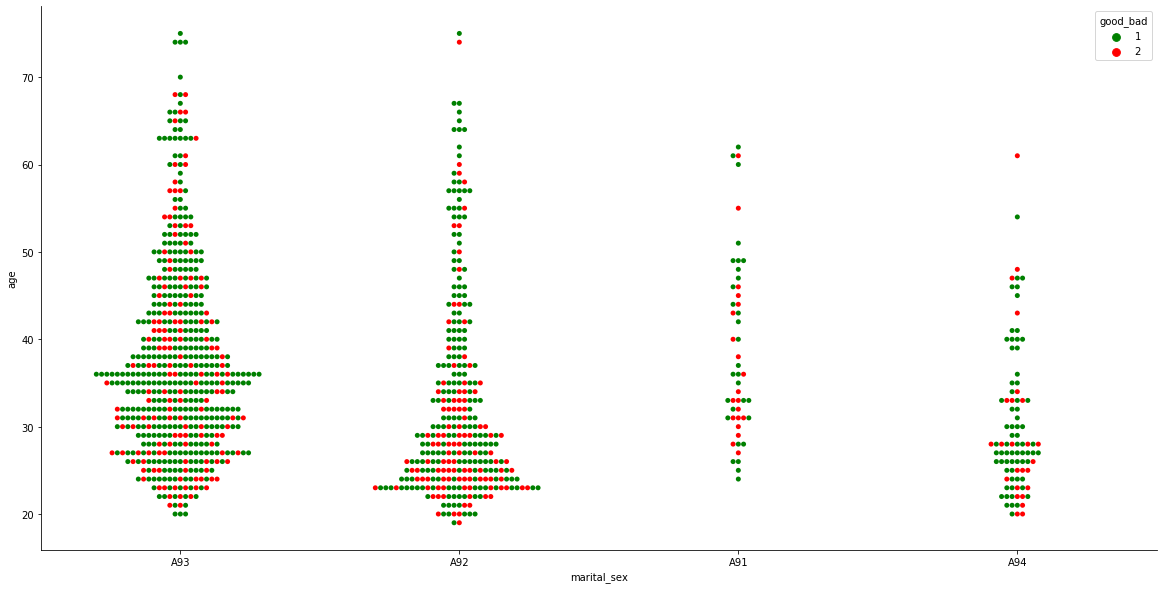

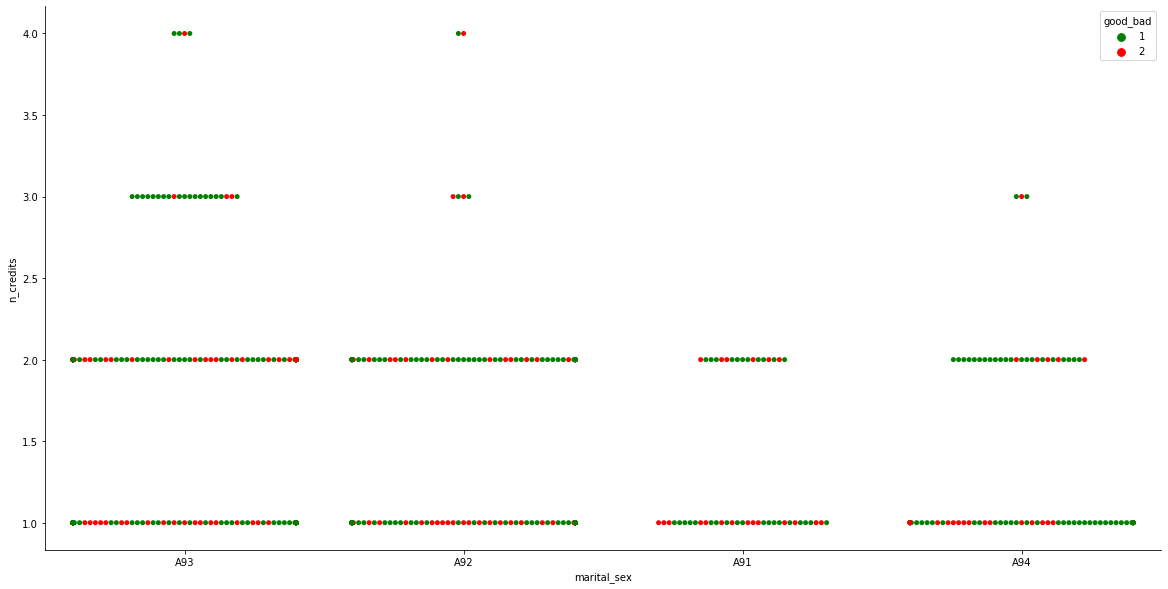

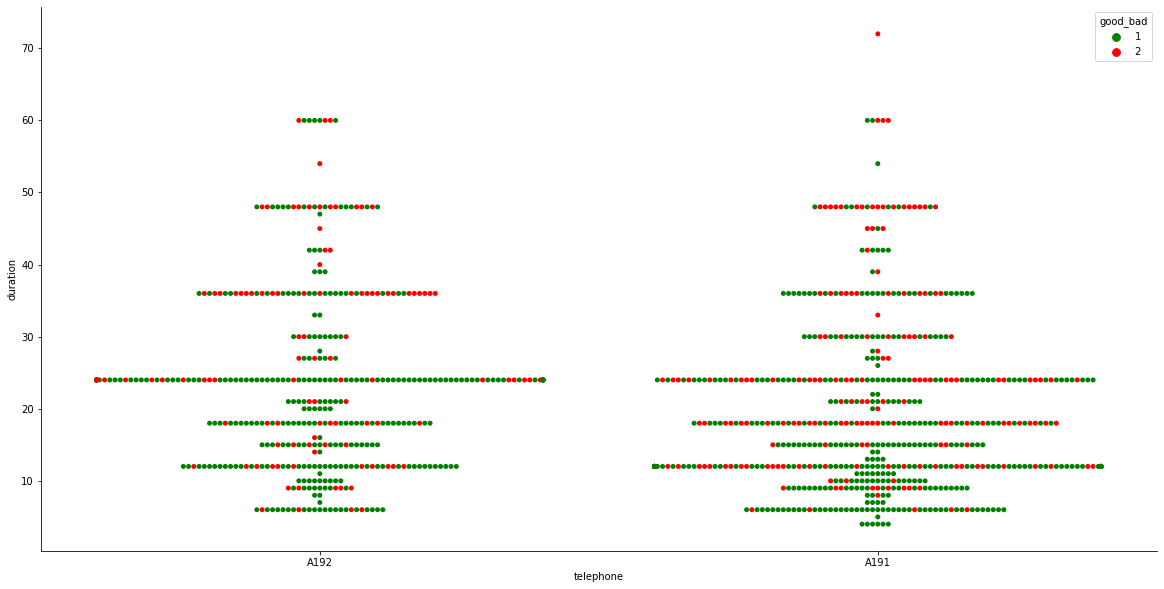

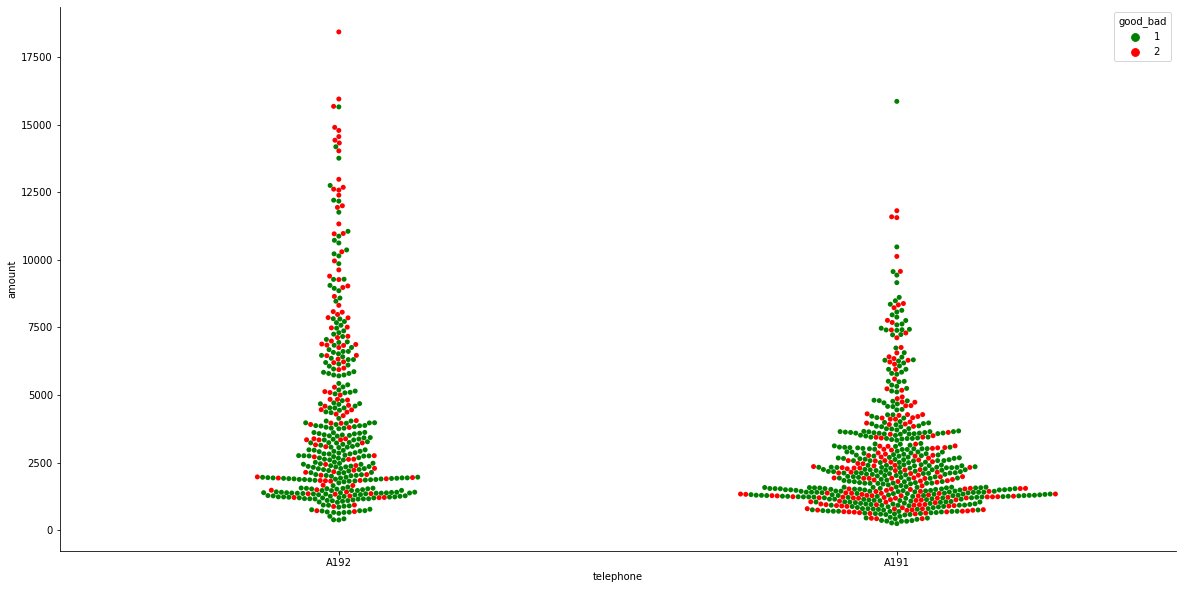

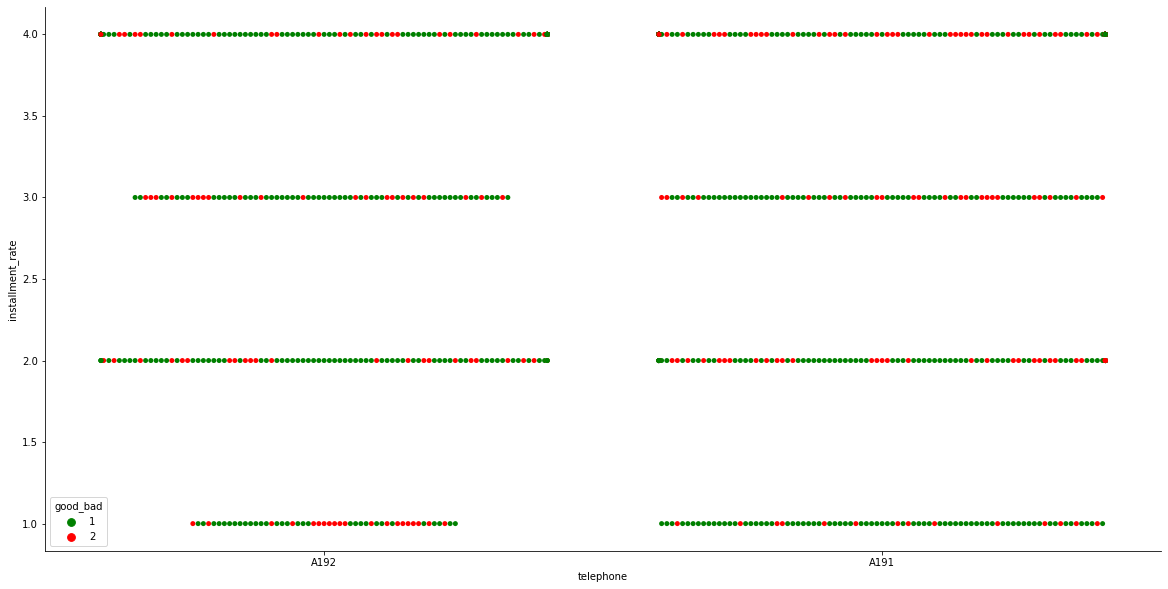

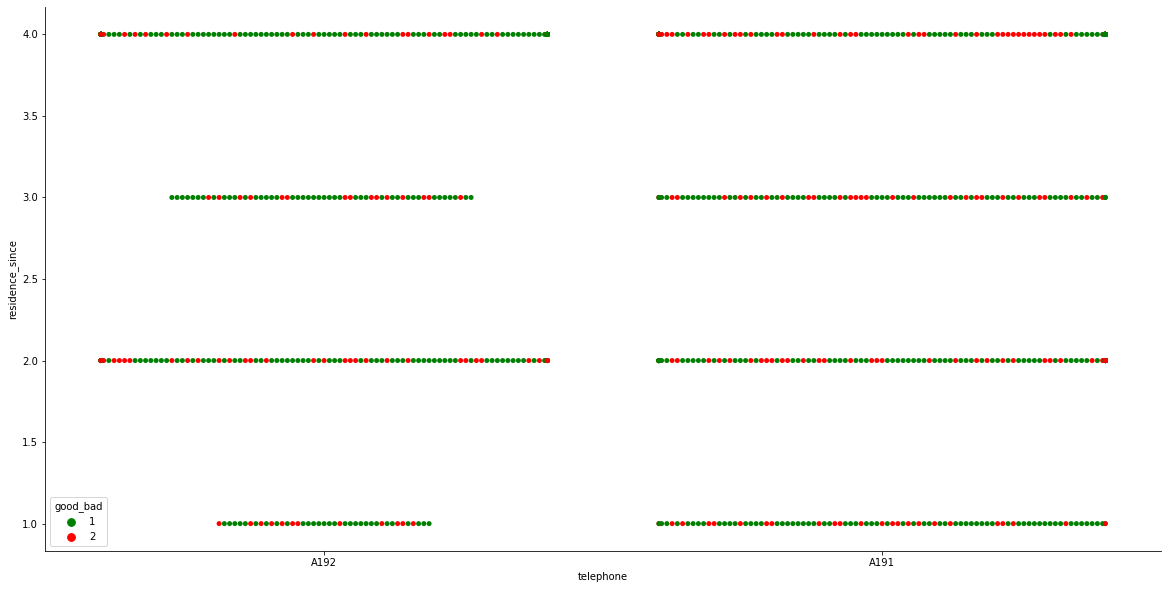

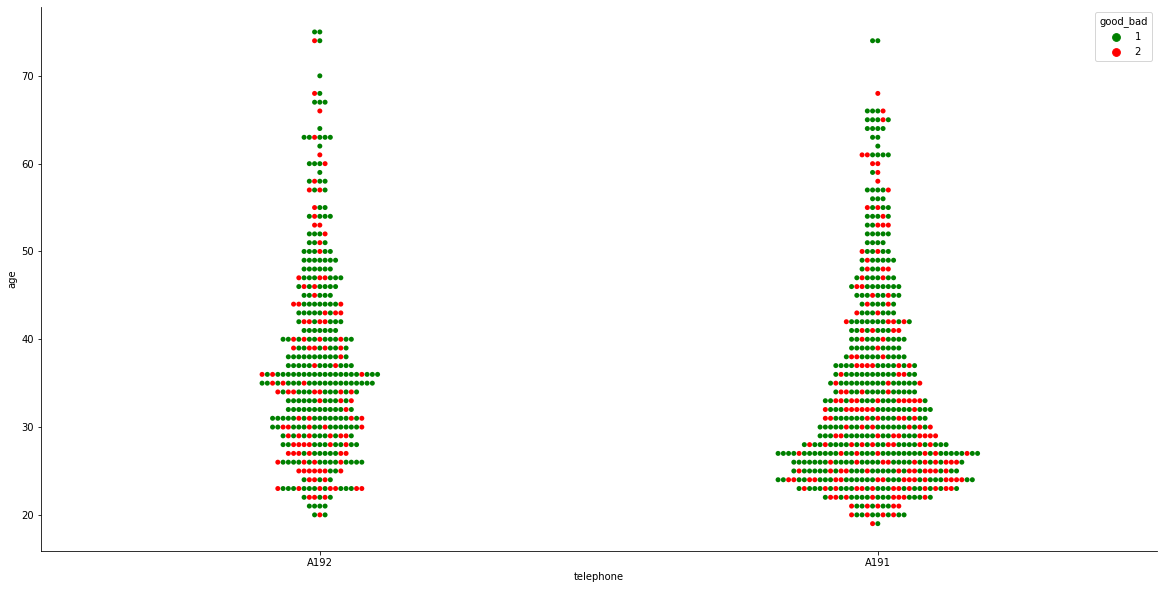

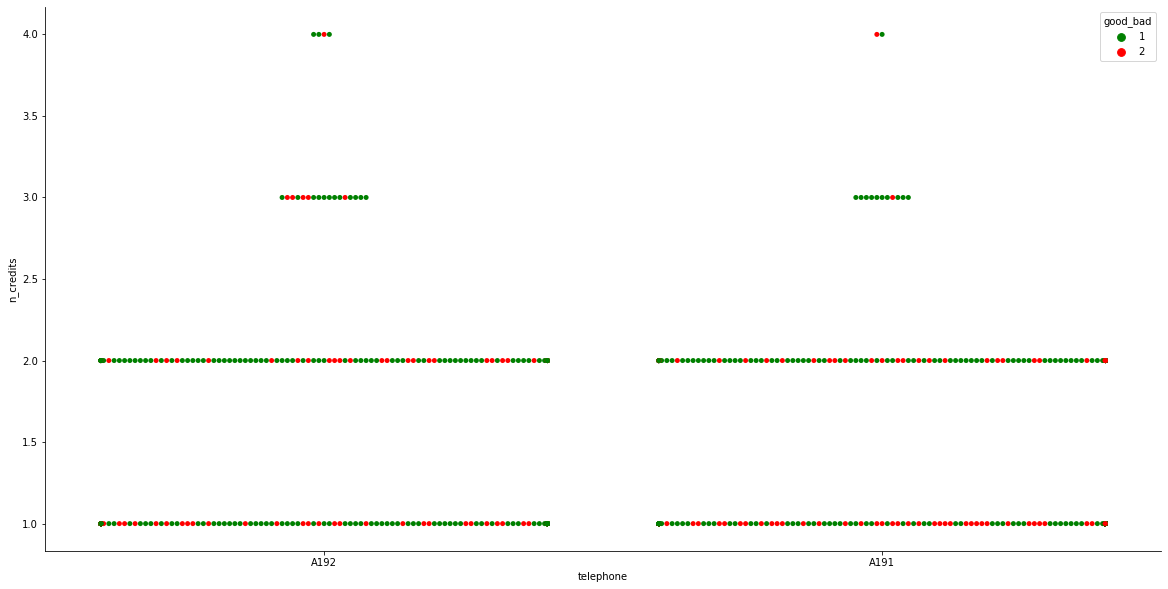

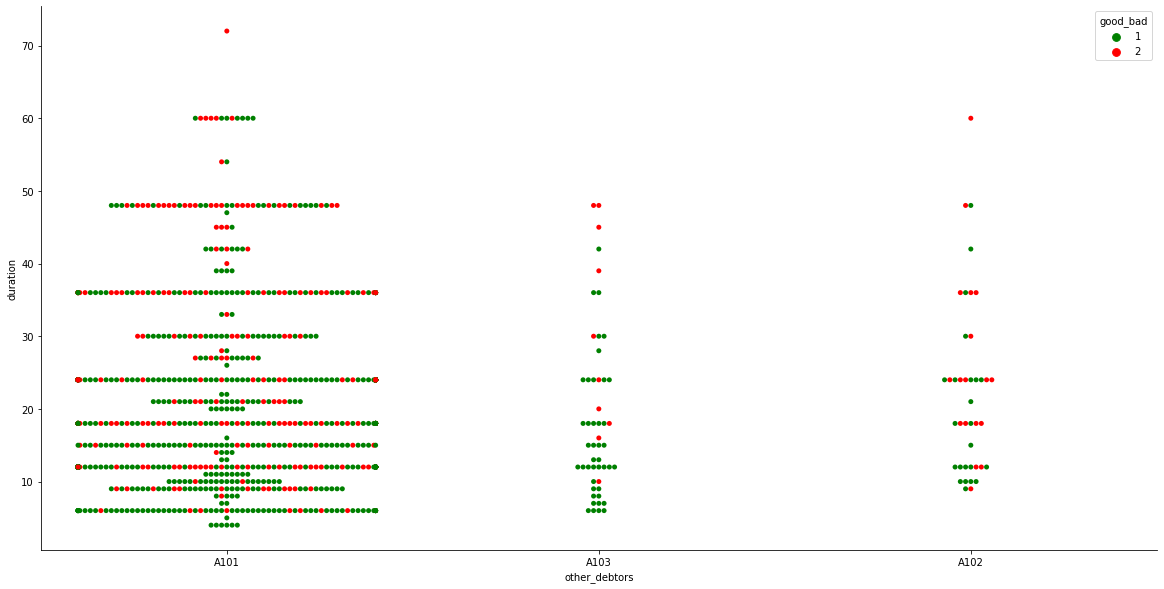

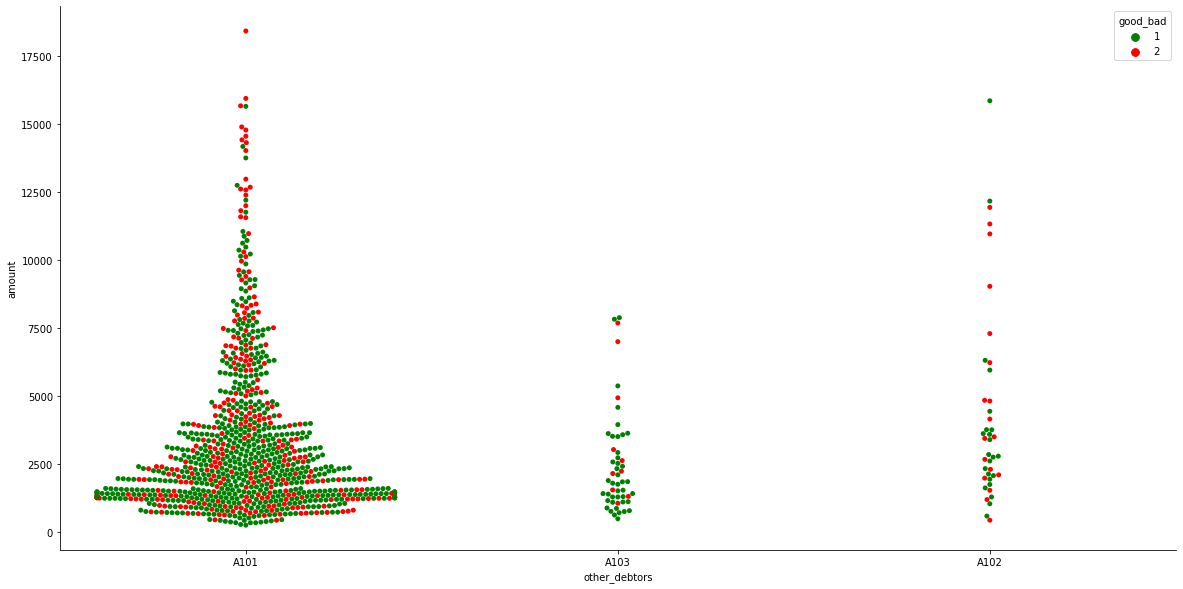

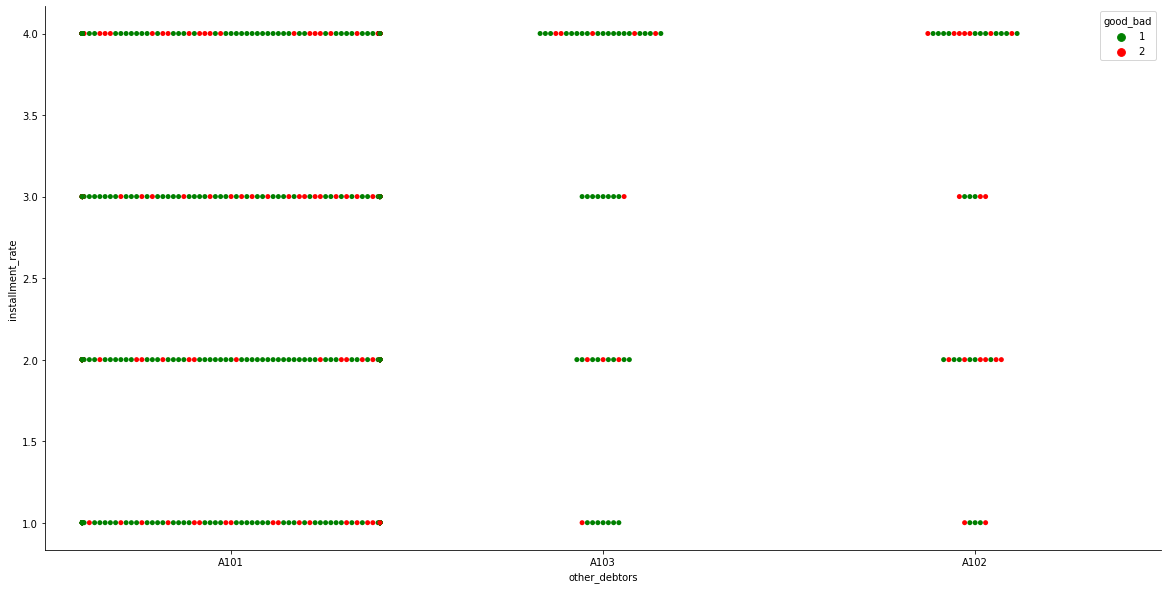

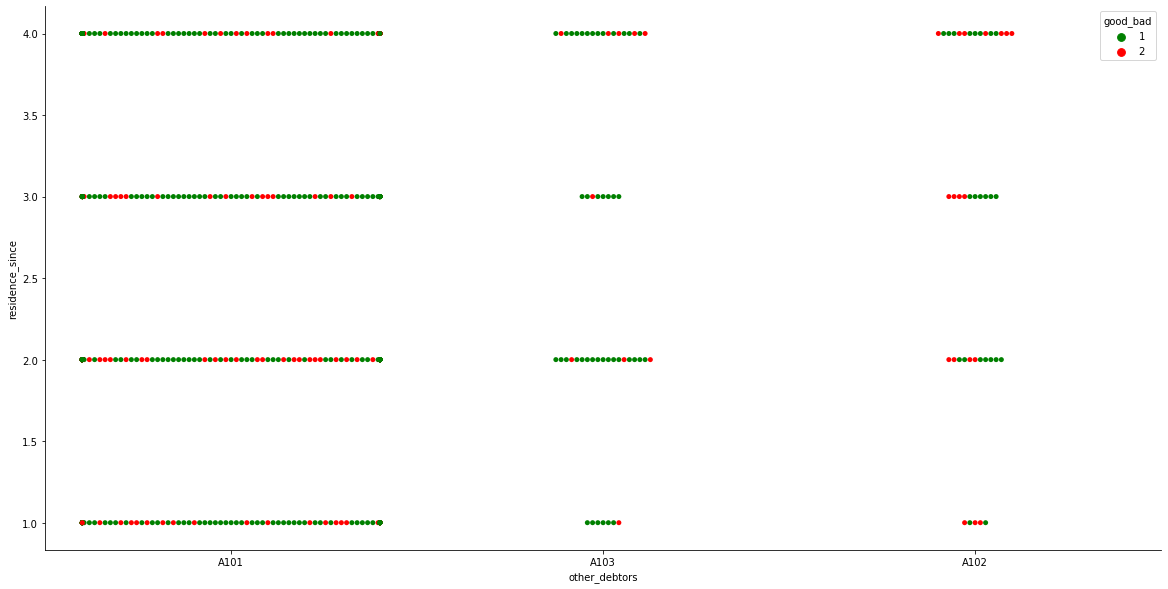

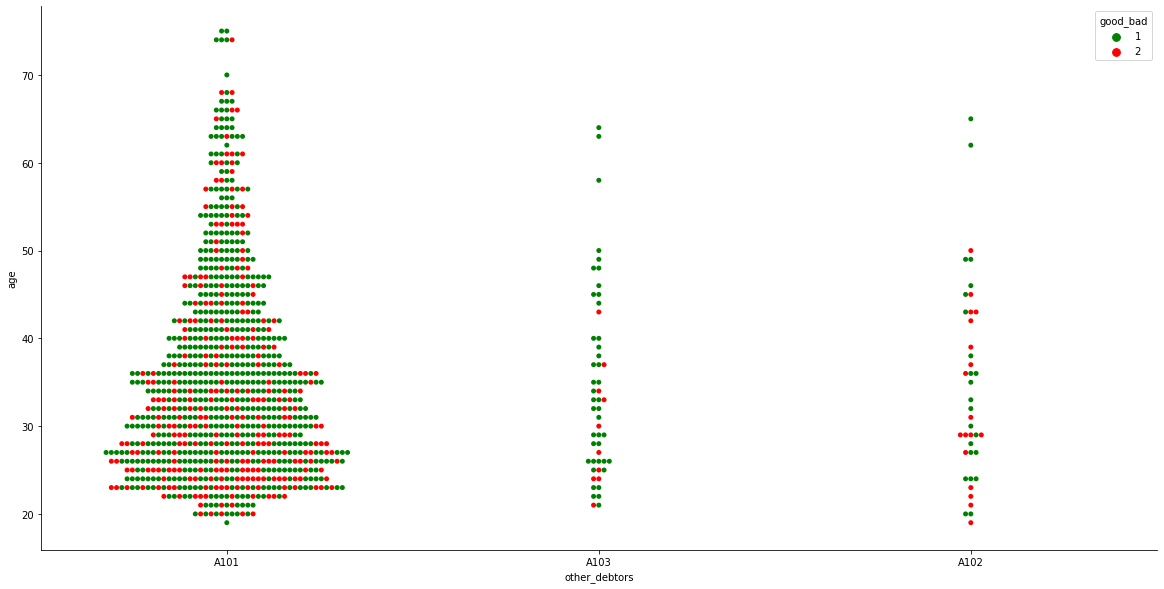

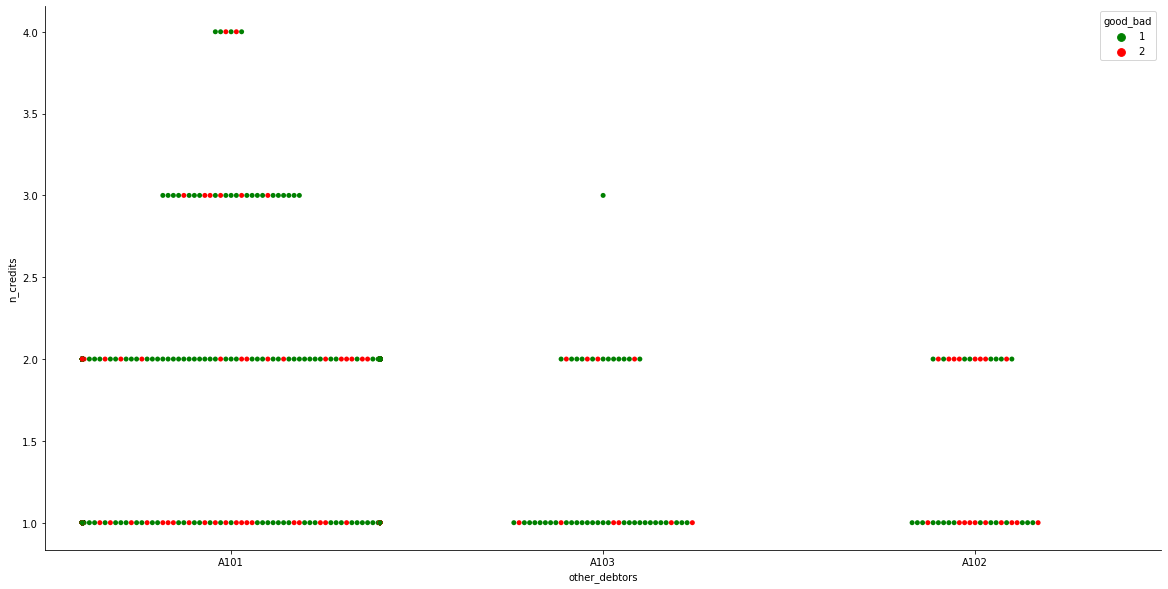

In [8]:
for col1 in ['history','purpose', 'job', 'marital_sex', 'telephone', 'other_debtors']:
    for col2 in [cname for cname in data.columns[:-1] if data[cname].dtype in ['int64', 'float64']][:-1]:
        fig, ax = plt.subplots()
        fig.set_size_inches(20, 10)    
        sns.swarmplot(x=col1, y=col2, ax = ax, data=data, hue = 'good_bad', palette=['g', 'r']);

        sns.despine()

A few interesting facts can be inferred from the graphs:
* 'history' column has mistakenly labeled values, because there is no logic behind the results. Column won't be dropped because model might still find correlation.
*  Loans with 'purpose' car (used) are bad if the amount of money is less than 2500 DM.
*  Clients in job category 'management/ self-employed/highly qualified employee/ officer' are bad borrowers, if installment rate is too low.
*  Clients in job category 'unemployed/ unskilled  - non-resident' are bad borrowers, if they live in their current residence less than 2 years.
*  Unfortunately 'marital_sex' variable didn't show any correlations. I think that poor combination of the marital status and sex is the reason for that. When I did [customer segmentation with similar bank dataset](https://github.com/aza-atabayev/bank-marketing-clustering) main variable in clustering was marital status. To be exact model even found differences between behaviours of single and divorced/widowed clients.
*  Telephone doesn't affect the result value.

# Data preprocessing
Before actual model building, I have to preprocess raw data - specifically categorical vavlues.

## Logical label encoding
I will manually encode certain variables that makes sense in the context of the problem (e.g. 'check_acc' no account = 0, a moderate amount of money = 1, more money = 2, negative state = -1). 

In [9]:
# encoding 'check_acc'
data.replace({'A11': -1, 'A14': 0, 'A12': 1, 'A13': 2}, inplace = True)   # more money -> bigger label

# encoding 'history'; I previously said that it was misslabeled, but I hope at least in the right order
data.replace({'A30': 0, 'A31': 1, 'A32': 2, 'A33': 3, 'A34': 4}, inplace = True)   # worse history - > bigger label

# encoding 'savings'
data.replace({'A65': 0, 'A61': 1, 'A62': 2, 'A63': 3, 'A64': 4}, inplace = True)   # more money -> bigger label

# encoding 'employment'
data.replace({'A71': 0, 'A72': 1, 'A73': 2, 'A74': 3, 'A75': 4}, inplace = True)   # longer employment duration -> bigger label

# encoding 'other_debtors'
data.replace({'A101': 0, 'A102': 1, 'A103': 2}, inplace = True)    # more reliable other debtor -> bigger label

# encoding 'property'
data.replace({'A124': 0, 'A123': 1, 'A122': 2, 'A121': 3}, inplace = True)   # more expensive property -> bigger label

# encoding 'housing'
data.replace({'A153': 0, 'A151': 1, 'A152': 2}, inplace = True)   # more expensive -> bigger label

# encoding 'job'
data.replace({'A171': -1, 'A172': 0, 'A173': 1, 'A174': 2}, inplace = True)   # more skilled -> bigger label

# encoding 'telephone'
data.replace({'A191': 0, 'A192': 1}, inplace = True)   # no phone number -> 0, phone number listed -> 1

# encoding 'foreign_worker'
data.replace({'A202': 0, 'A201': 1}, inplace = True)   # not a foreign_worker -> 0, foreign_worker -> 1

# encoding 'good_bad'
data.replace({'good_bad' : {1: 1, 2 : 0}}, inplace = True)   # good -> 1, bad -> 0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   check_acc               1000 non-null   int64 
 1   duration                1000 non-null   int64 
 2   history                 1000 non-null   int64 
 3   purpose                 1000 non-null   object
 4   amount                  1000 non-null   int64 
 5   savings                 1000 non-null   int64 
 6   employment              1000 non-null   int64 
 7   installment_rate        1000 non-null   int64 
 8   marital_sex             1000 non-null   object
 9   other_debtors           1000 non-null   int64 
 10  residence_since         1000 non-null   int64 
 11  property                1000 non-null   int64 
 12  age                     1000 non-null   int64 
 13  other_installment_plan  1000 non-null   object
 14  housing                 1000 non-null   int64 
 15  n_cre

I can see that 'purpose', 'marital_sex', and 'other_installment_plan' columns left.
* I will one-hot encode 'purpose' column, because there is no better way for representing it.
* I will drop 'marital_sex' column because it didn't show any correlation, and grouping in that column is misleading.
* I will one-hot encode 'other_installment_plan' column, because there are only 3 unique values.

# One-hot encoding

In [11]:
# deleting 'marital_sex'
data.drop('marital_sex', axis = 1, inplace = True)

# one-hot encoding 'purpose'
one_hot = pd.get_dummies(data['purpose'])
data.drop('purpose', axis = 1, inplace = True)
data = data.join(one_hot)

# one-hot encoding 'purpose'
one_hot = pd.get_dummies(data['other_installment_plan'])
data.drop('other_installment_plan', axis = 1, inplace = True)
data = data.join(one_hot)

In [12]:
# Selecting X and y
X = data.loc[:, data.columns != 'good_bad']
y = data['good_bad']

from sklearn.model_selection import train_test_split

# splitting data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state = 3, shuffle = True) #splittin

# checking that split is even
y_train.sum()/y_train.count() - y_test.sum()/y_test.count()

0.006250000000000089

It means that difference between their structure is a less than 1 percent.

# Model Building
## Baseline model

In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:,1]

To evaluate our models I will use ROC curve and AUC (area under ROC curve). Model with the bigger AUC is generally better. 'True Positive Rate' in ROC curve is probability that an actual positive will test positive (e.g. fraction of correctly predicted good customers from actual good customers). 'False Positive Rate' is probability that positive result will be given to an actual negative (e.g. fraction of incorrectly predicted good customers from bad customers). Due to the problem statement False Positive Rate is more important to us than True Positive Rate.

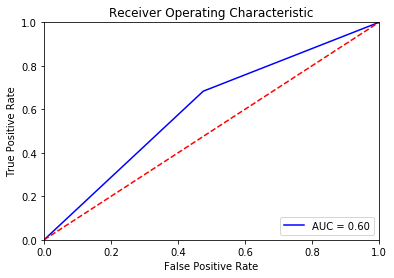

In [14]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



## Model selection

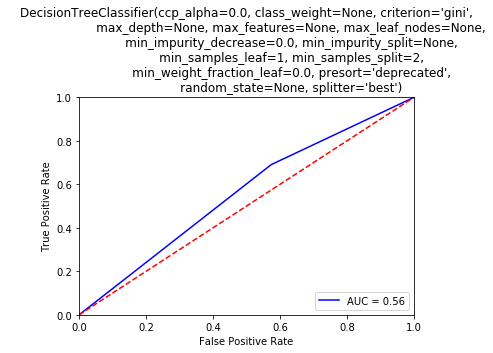

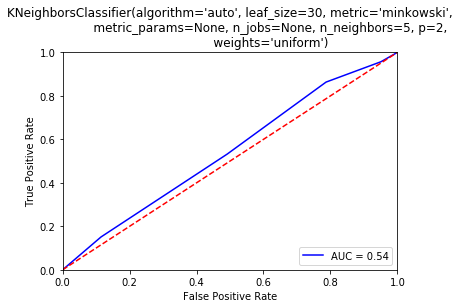

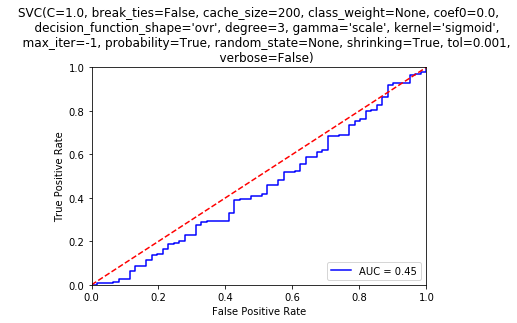

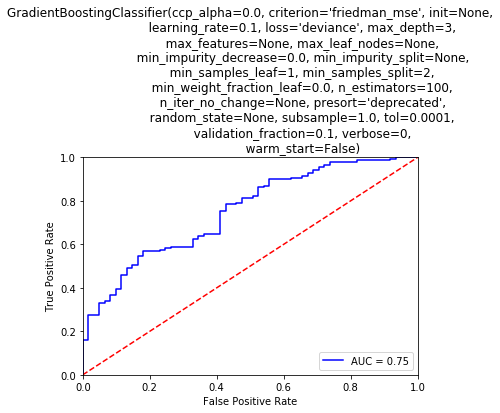

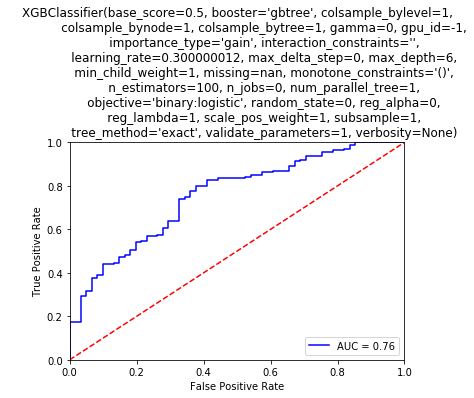

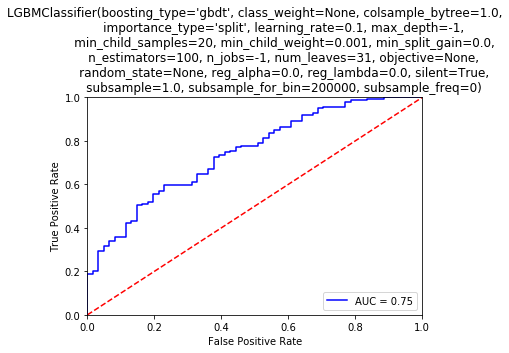

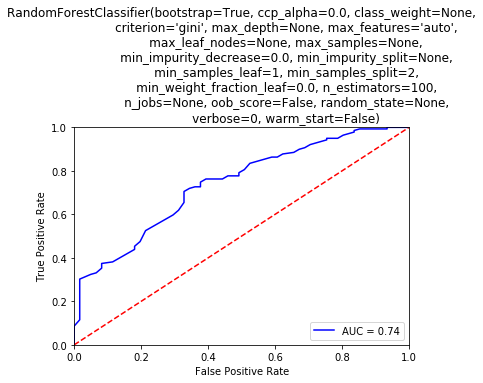

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

for mod in (DecisionTreeClassifier(), KNeighborsClassifier(), SVC(kernel = 'sigmoid', probability = True), GradientBoostingClassifier(), XGBClassifier(), LGBMClassifier(), RandomForestClassifier()):
    model = mod
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:,1]
    
    
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title(str(mod))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

We can see that Gradient Boosting, Extreme Gradient Boosting, Light Gradient Boosting and Random Forest Classifier have shown similar performance based on AUC. However, since we work with real credit data we can estimate approximate profits based on our raw predictions to choose the model. 

Before that we have to check that 'amount' value is evenly distributed among test and train data.

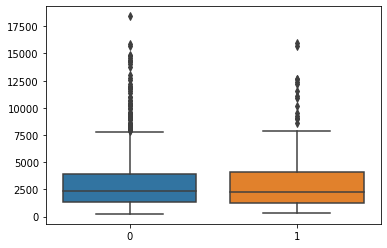

In [16]:
sns.boxplot(data= (X_train['amount'], X_test['amount']))

Looks good enough.

In [17]:
y_test = np.array(y_test)
X_amount = np.array(X_test['amount'])

max_profit = sum(X_test['amount'] * y_test) # computing maximum profit as if model made only correct predictions

for mod in (GradientBoostingClassifier(), XGBClassifier(), LGBMClassifier(), RandomForestClassifier()):
    model = mod
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:,1]
    
    print('\n', str(mod))
    
    for threshold in (0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1):
        profit = 0
        for i in range(len(y_prob)):
            if y_prob[i] >= threshold and y_test[i] == 1 : # if predicted and real credit is good add this value to profit
                profit += X_amount[i]
            elif y_prob[i] >= threshold and y_test[i] == 0: # if predicted credit is good and real credit is bad substract this value to profit
                profit -= X_amount[i] * 0.5 # before becoming bad, clients still pay some amount of money back. 
                                            # if we had data about average bad payment we could use that but for now I will use 50% 
        print('For threshold of', threshold, 'fraction of profit is', round(profit/max_profit, 4) * 100,'%')




 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
For threshold of 0 fraction of profit is 72.47 %
For threshold of 0.1 fraction of profit is 72.47 %
For threshold of 0.2 fraction of profit is 73.04 %
For threshold of 0.3 fraction of profit is 76.98 %
For threshold of 0.4 fraction of profit is 74.71 %
For threshold of 0.5 fraction of profit is 70.30

Based on profit evaluation LGBMClassifier shows the best performance with threshold of 0.3.

In [18]:
model = LGBMClassifier()
model.fit(X_train, y_train)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Results analysis
Since this model should work in the banking business sector. Model explainability is very important. Moreover, some laws require companies to show the decision process of accpeting or rejecting the credits. Furthermore, it must be proved that model doesn't disadvantage customers on racial, gender or any other aspects that can be considered by court as discrimination.

In [19]:
from eli5.sklearn import PermutationImportance
import eli5

perm = PermutationImportance(model, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist()) #calculates weights of each column/parameter

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.1135 ± 0.0196,check_acc
0.1102 ± 0.0177,amount
0.0800 ± 0.0091,duration
0.0488 ± 0.0085,age
0.0420 ± 0.0068,history
0.0392 ± 0.0064,savings
0.0245 ± 0.0087,A41
0.0182 ± 0.0094,residence_since
0.0170 ± 0.0025,employment
0.0170 ± 0.0044,installment_rate


Permutation importance test shows that features such as 'check_acc', 'amount', 'duration', 'age' and 'history' play the major role in the decision making. All of these features are purely connected to financial conditions of the customer, which is good.

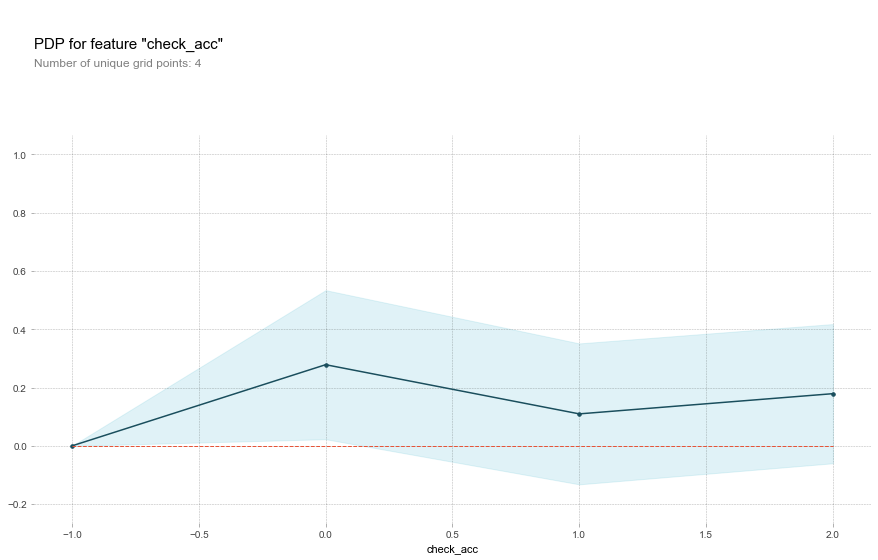

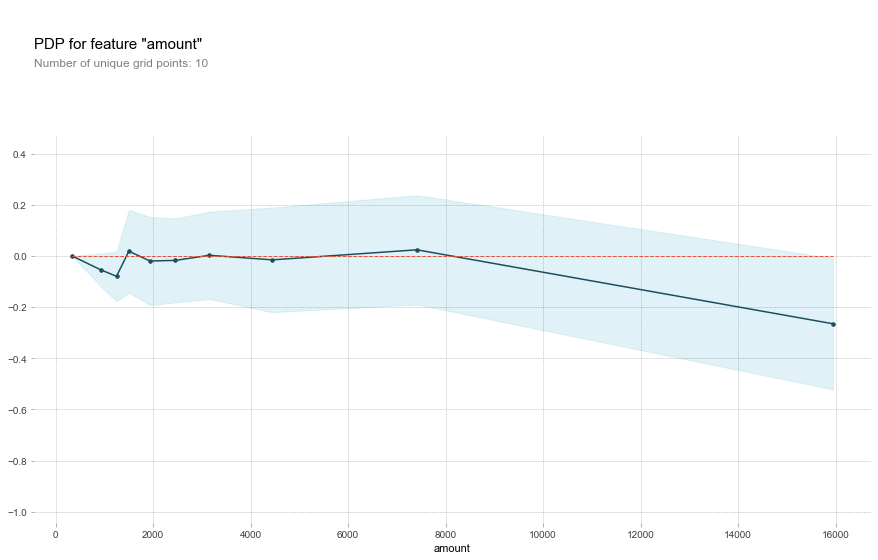

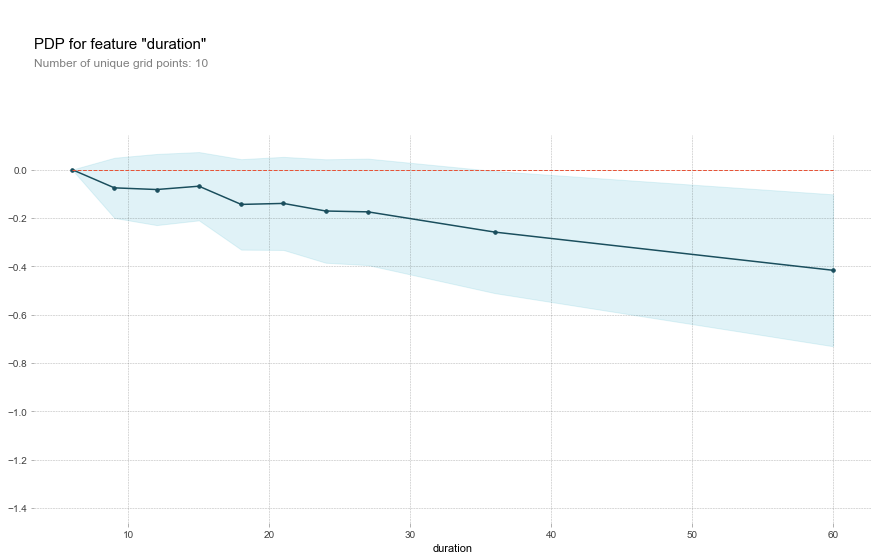

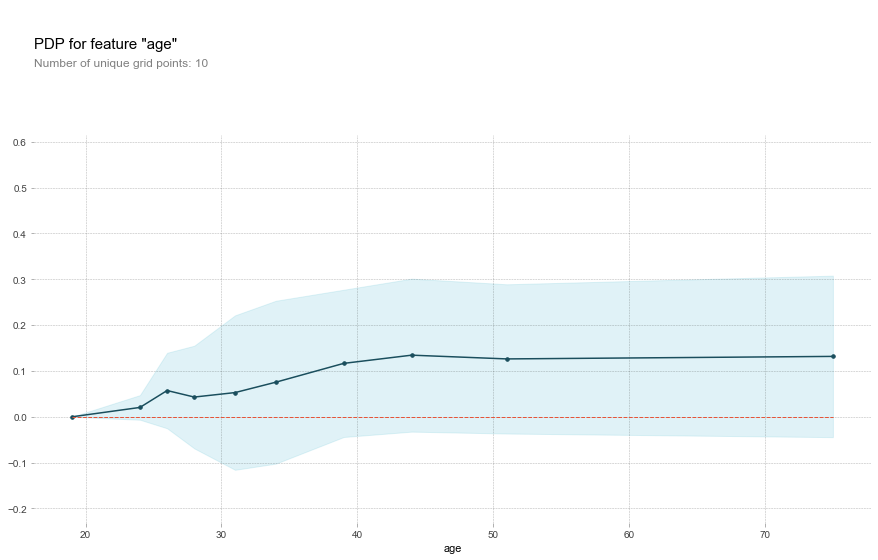

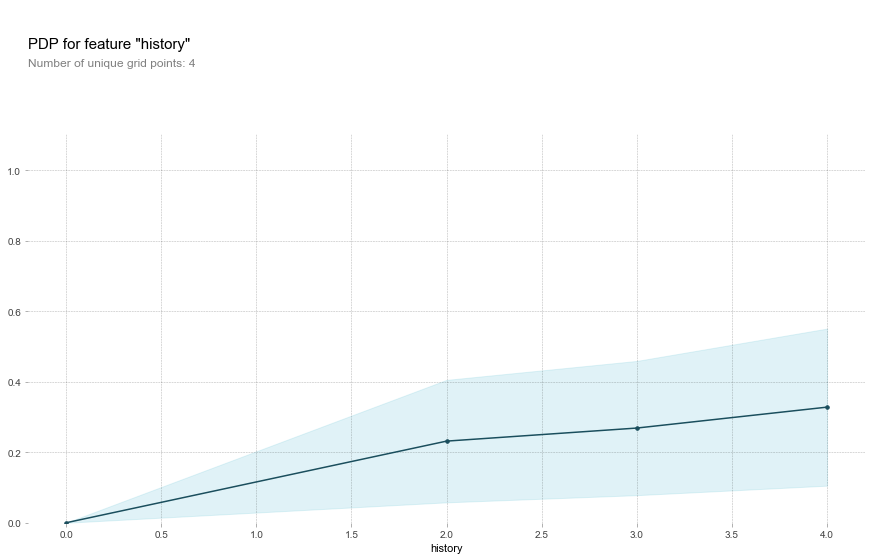

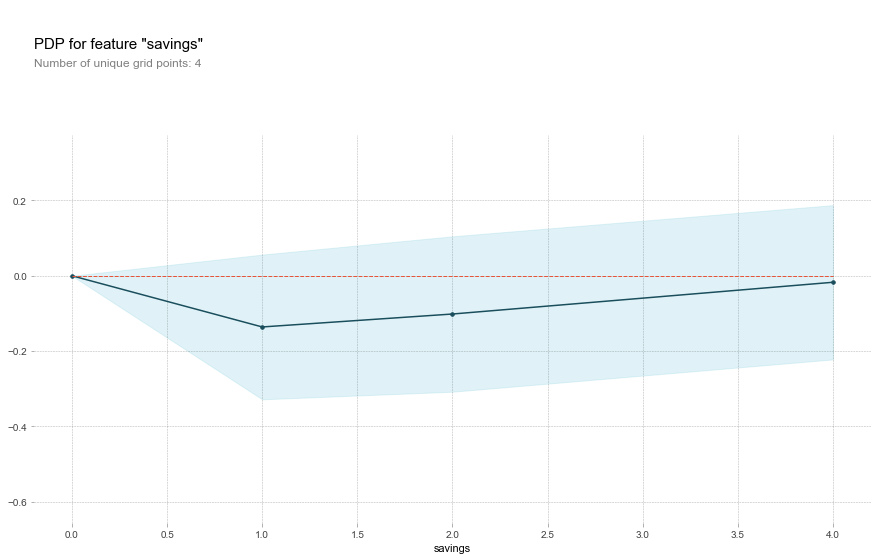

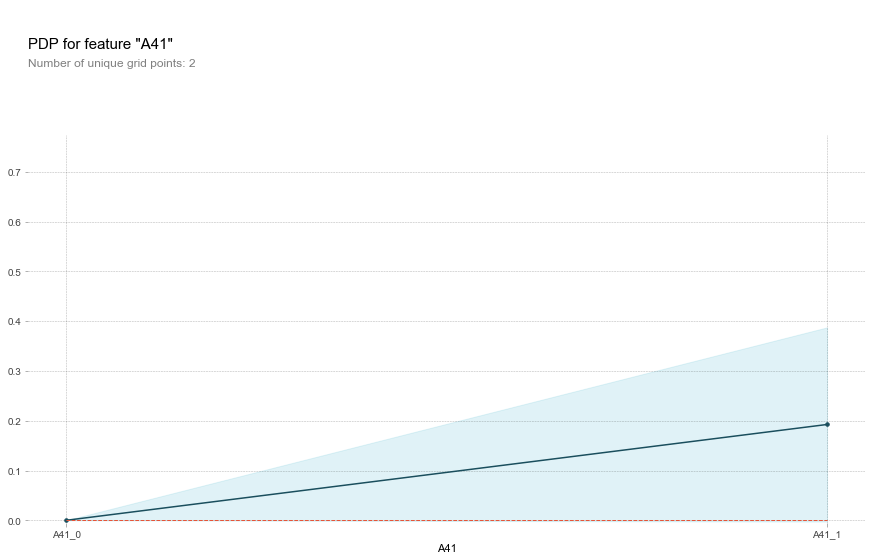

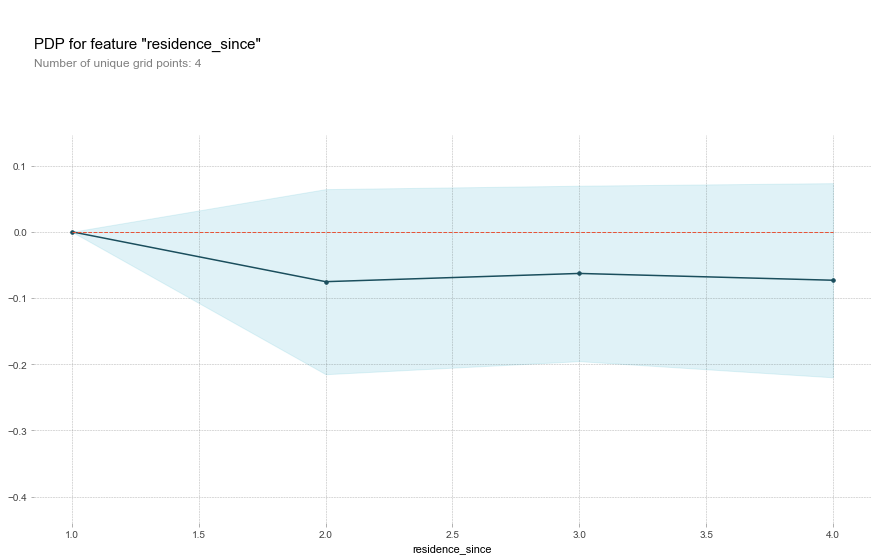

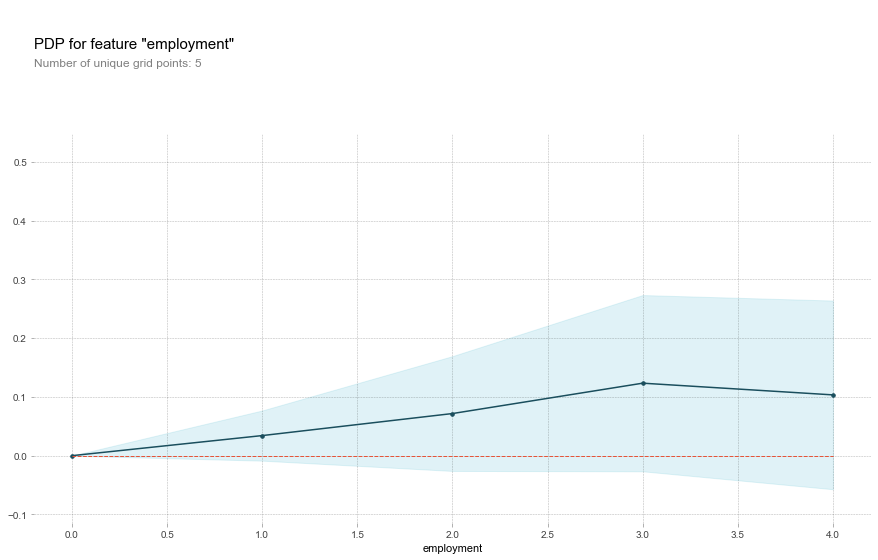

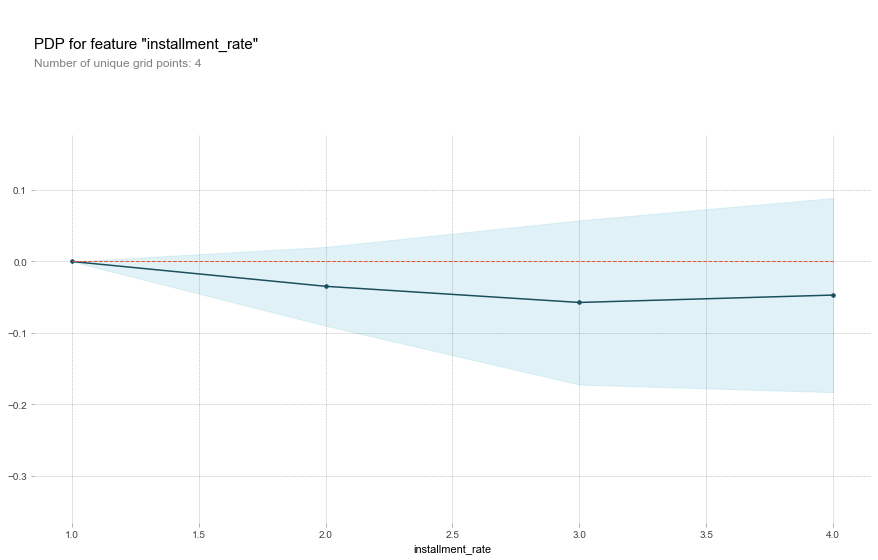

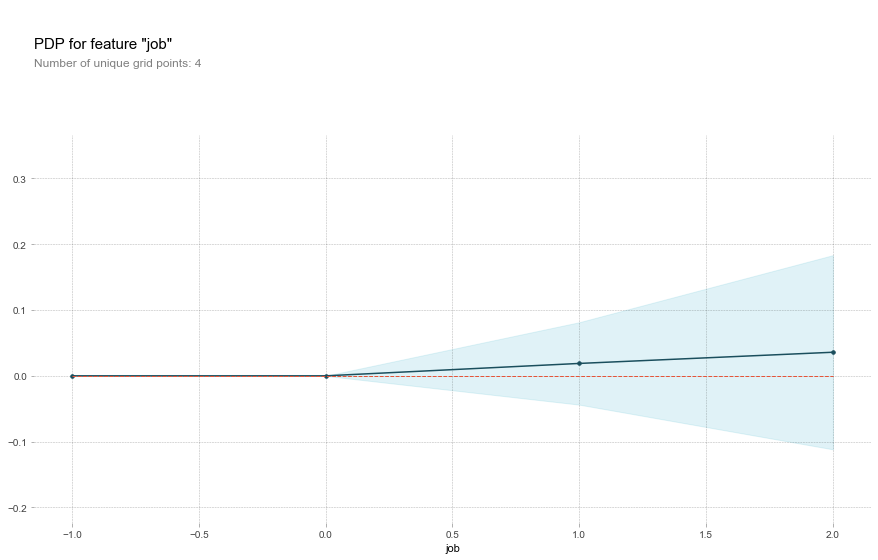

In [20]:
from pdpbox import pdp, get_dataset, info_plots
features_to_plot = ['check_acc', 'amount', 'duration', 'age', 'history', 'savings', 'A41', 'residence_since', 'employment', 'installment_rate', 'job']
for feature in features_to_plot:
    pdp_graph = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X_test.columns.tolist(), feature = feature)

    pdp.pdp_plot(pdp_graph, feature)
    plt.show()

It is quite interesting that 'residence_since' showed negative correlation with the credit score. Let's trace this effect with the combination with other features.

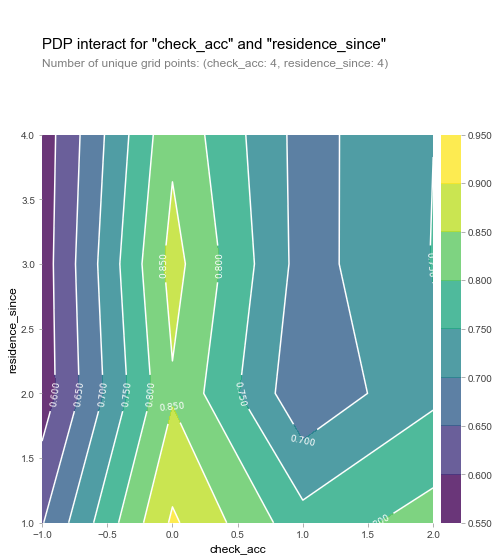

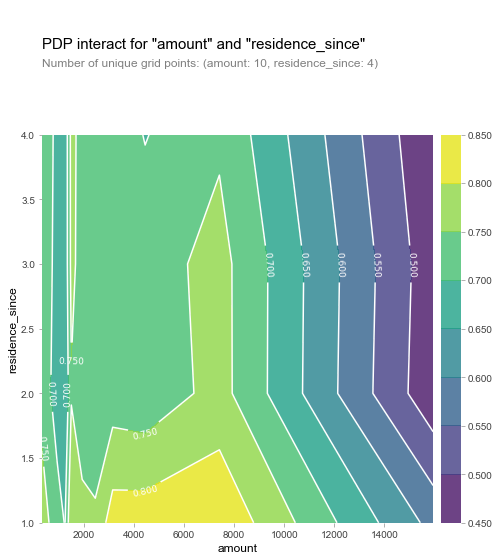

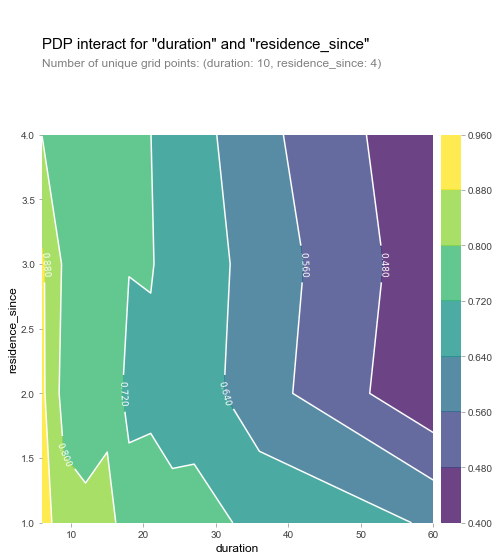

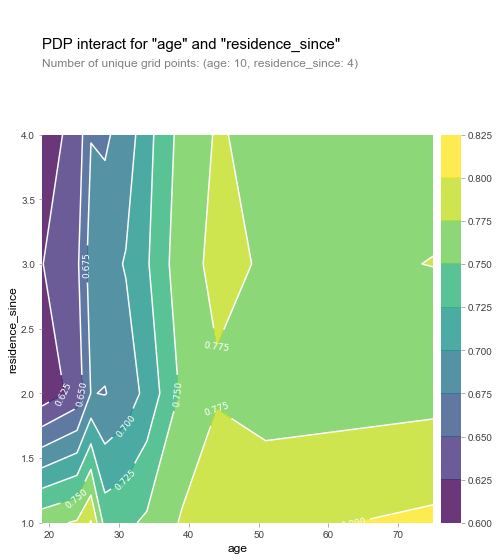

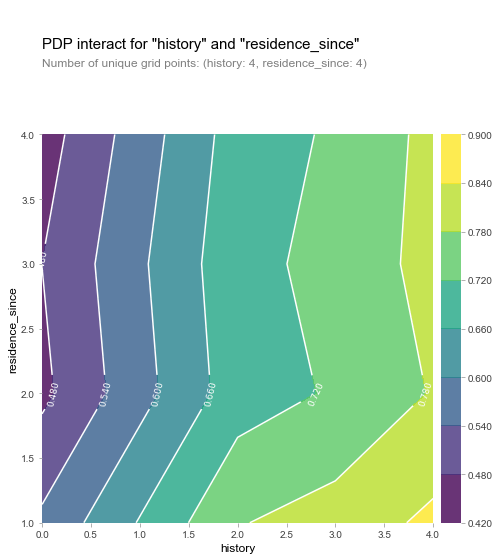

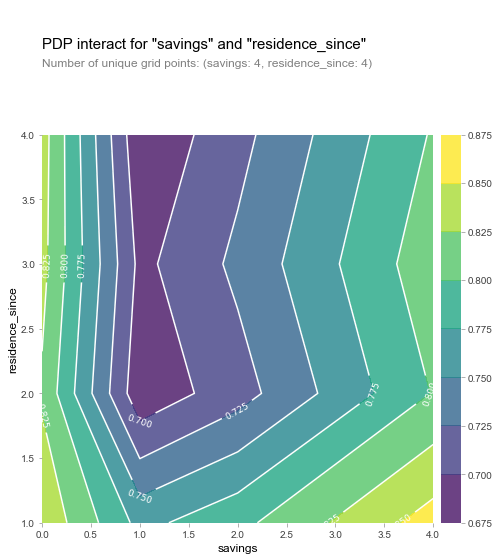

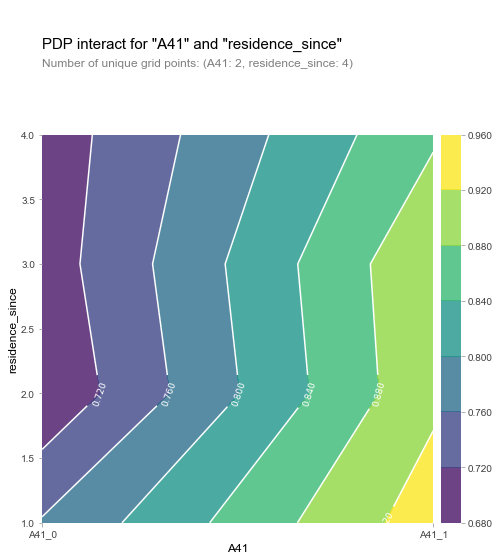

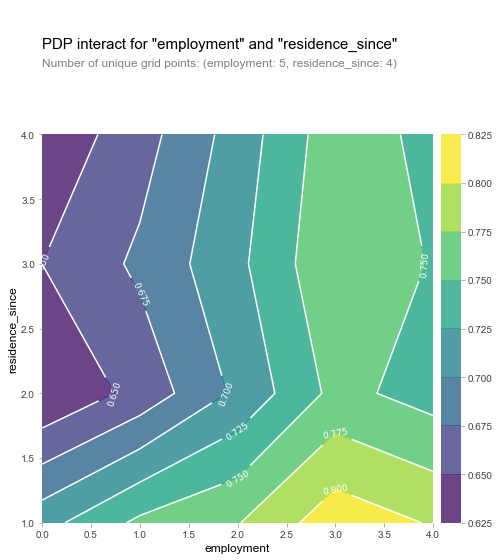

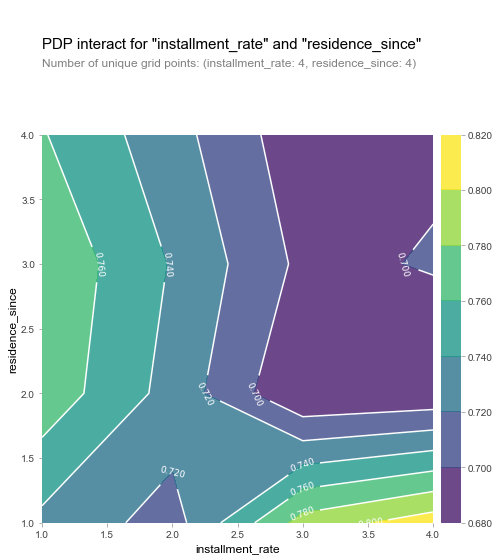

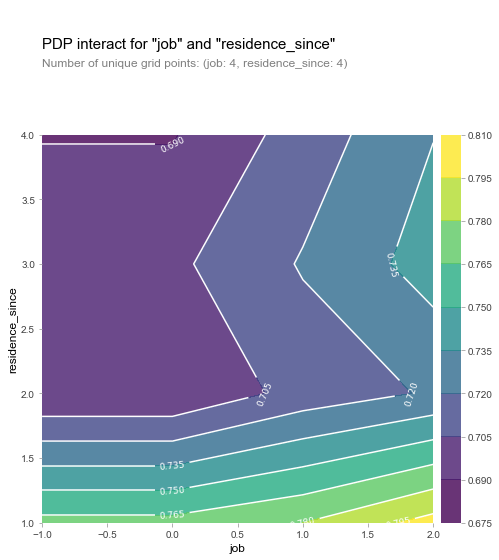

In [21]:
from pdpbox import pdp, get_dataset, info_plots

features_to_plot.pop(7)

for feature in features_to_plot:
    features = [feature, 'residence_since']
    inter1  =  pdp.pdp_interact(model=model, dataset=X_test, model_features=X_test.columns.tolist(), features=features)

    pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features, plot_type='contour')
    plt.show()

Based on the last two graphs, it can be infered that credit officers of that bank consider 'residence_since' as a feature that shows how often client makes big purchases (such as new housing). This means that if client didn't buy a house lately but asks for high installment rate, client is bad. If client assumingly has low salary and wasn't capable of buying a home, client is bad.

# Conclusion

* Model with the accuracy of 77.63% was developed
* Threshold of 300 credit points was found to be the most efficient
* The best predictors of bad/good credits are money on the current account, amount of credit, duration of the credit period, age of the customer, history of paying the credits, money on the savings account.